# Libraries 

In [1]:
import pandas as pd

import numpy as np

import matplotlib as mpl

import matplotlib.pyplot as plt

import seaborn as sns 

sns.set(color_codes = True)

%matplotlib inline

import plotly.graph_objects as go

from plotly.subplots import make_subplots

from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter

from nltk.sentiment import SentimentIntensityAnalyzer

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from textblob import Word

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score, KFold

from textblob import TextBlob

import gender_guesser.detector as gender

import nltk

from nltk.corpus import stopwords

import re

import emoji

from scipy.stats import chi2_contingency

from matplotlib.patches import ConnectionPatch

from langdetect import detect

from nltk.probability import *

from nltk.tokenize import word_tokenize

from nltk import pos_tag

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

import plotly.graph_objects as go

from plotly.subplots import make_subplots

from afinn import Afinn

from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import RandomForestClassifier

from nltk.text import Text

In [2]:
#pip install emoji

In [3]:
#pip install genderize

In [4]:
#!pip install gender-guesser

In [5]:
#pip install --upgrade seaborn pandas

In [6]:
#pip install langdetect

In [7]:
#pip install afinn

In [8]:
#pip install wordcloud

### Color Pallete Brand Kit

"#ff914d"  -- Orange
"#1a562a"  -- Green

# Raw Data

In [9]:
f = pd.read_csv("file2793.csv")

In [10]:
f.head(1)

displayName starRating  \
0  Cássio Trajano       FIVE   

                                             comment  \
0  (Translated by Google) I'm there every beginni...   

                    createTime                   updateTime   reviewer_name  \
0  2019-01-29T16:49:28.556676Z  2019-01-29T16:49:28.556676Z  Cássio Trajano   

                              review_id  
0  ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB

In [11]:
f.tail(1)

displayName starRating  \
2792  Marcelo o empreendedor       FIVE   

                                                comment  \
2792  (Translated by Google) The group played paintb...   

                    createTime                updateTime  \
2792  2018-01-20T15:32:53.260Z  2018-01-20T15:34:48.062Z   

               reviewer_name                             review_id  
2792  Marcelo o empreendedor  ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB

In [12]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   displayName    2793 non-null   object
 1   starRating     2793 non-null   object
 2   comment        1648 non-null   object
 3   createTime     2793 non-null   object
 4   updateTime     2793 non-null   object
 5   reviewer_name  2793 non-null   object
 6   review_id      2793 non-null   object
dtypes: object(7)
memory usage: 152.9+ KB


# EDA

In [13]:
f["starRating"].unique()

array(['FIVE', 'THREE', 'FOUR', 'TWO', 'ONE'], dtype=object)

In [14]:
f["starRating"].replace('ONE', 1, inplace = True)
f["starRating"].replace('TWO', 2, inplace = True)
f["starRating"].replace('THREE', 3, inplace = True)
f["starRating"].replace('FOUR', 4, inplace = True)
f["starRating"].replace('FIVE', 5, inplace = True)

In [15]:
f["comment"] = f["comment"].astype(str)  

split_df = f["comment"].str.split('(Original)', expand=True, n=1)
f["before_original"] = split_df[0]
f["after_original"] = split_df[1]

In [16]:
f.tail(1)

displayName  starRating  \
2792  Marcelo o empreendedor           5   

                                                comment  \
2792  (Translated by Google) The group played paintb...   

                    createTime                updateTime  \
2792  2018-01-20T15:32:53.260Z  2018-01-20T15:34:48.062Z   

               reviewer_name                             review_id  \
2792  Marcelo o empreendedor  ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB   

                                        before_original after_original  
2792  (Translated by Google) The group played paintb...       Original

In [17]:
def clean_text(text):
    if pd.notna(text):  
       
        text = text.replace('(Translated by Google)', '')

        text = text.replace('\n\n(Original)\n', '')
  
        text = text.replace('\n\n', '')
  
        text = text.replace('(', '')

        text = text.replace('\\', '')

        return text.strip()  
    else:
        return text  

f["cleaned_text"] = f["before_original"].apply(clean_text)

In [18]:
f["Year"] = f["createTime"].str[:4]

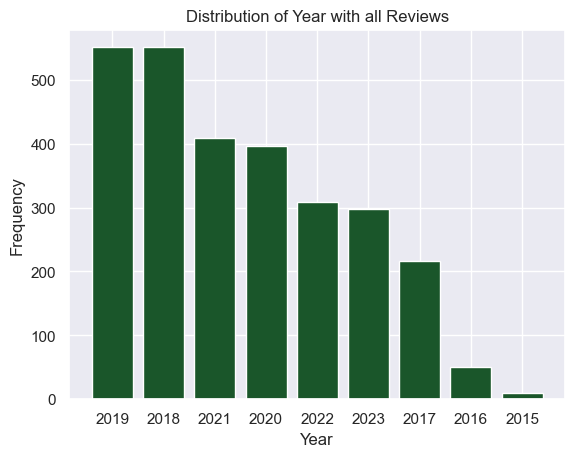

In [19]:
plt.bar(f["Year"].value_counts().index, f["Year"].value_counts(), 
        color = "#1a562a")

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Year with all Reviews")
plt.show()

In [20]:
f.head(1)

displayName  starRating  \
0  Cássio Trajano           5   

                                             comment  \
0  (Translated by Google) I'm there every beginni...   

                    createTime                   updateTime   reviewer_name  \
0  2019-01-29T16:49:28.556676Z  2019-01-29T16:49:28.556676Z  Cássio Trajano   

                              review_id  \
0  ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB   

                                     before_original after_original  \
0  (Translated by Google) I'm there every beginni...       Original   

                                        cleaned_text  Year  
0  I'm there every beginning of the year I highly...  2019

In [21]:
f["cleaned_text"].iloc[1]

'Very beautiful and pleasant place. Breakfast and lunch have a lot of variety and are delicious.'

In [22]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   displayName      2793 non-null   object
 1   starRating       2793 non-null   int64 
 2   comment          2793 non-null   object
 3   createTime       2793 non-null   object
 4   updateTime       2793 non-null   object
 5   reviewer_name    2793 non-null   object
 6   review_id        2793 non-null   object
 7   before_original  2793 non-null   object
 8   after_original   1613 non-null   object
 9   cleaned_text     2793 non-null   object
 10  Year             2793 non-null   object
dtypes: int64(1), object(10)
memory usage: 240.2+ KB


## Sentiment Analysis with Naive Bayes

https://textblob.readthedocs.io/en/dev/advanced_usage.html#advanced

In [23]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
blob = TextBlob(f["cleaned_text"].str.cat(sep = ' '), analyzer = NaiveBayesAnalyzer())
blob.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=7.79163748729048e-104)

In [24]:
mixed_language_text = f["cleaned_text"].str.cat(sep = ' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")

Sentiment: 0.4301541314931242


In [25]:
filtered_text = f[f['cleaned_text'].apply(lambda x: len(str(x).strip()) > 5)]

english_text = filtered_text[filtered_text['cleaned_text'].apply(lambda x: detect(str(x)) == 'en')]['cleaned_text']

mixed_language_text = english_text.str.cat(sep = ' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")

Sentiment: 0.4107153717254117


In [26]:
mixed_language_text = f["cleaned_text"].str.cat(sep = ' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")

Sentiment: 0.4301541314931242


In [27]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

f["Sentiment_Score"] = f["cleaned_text"].apply(analyze_sentiment)

In [28]:
f.tail(1)

displayName  starRating  \
2792  Marcelo o empreendedor           5   

                                                comment  \
2792  (Translated by Google) The group played paintb...   

                    createTime                updateTime  \
2792  2018-01-20T15:32:53.260Z  2018-01-20T15:34:48.062Z   

               reviewer_name                             review_id  \
2792  Marcelo o empreendedor  ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB   

                                        before_original after_original  \
2792  (Translated by Google) The group played paintb...       Original   

                                   cleaned_text  Year  Sentiment_Score  
2792  The group played paintball, a lot of fun.  2018              0.3

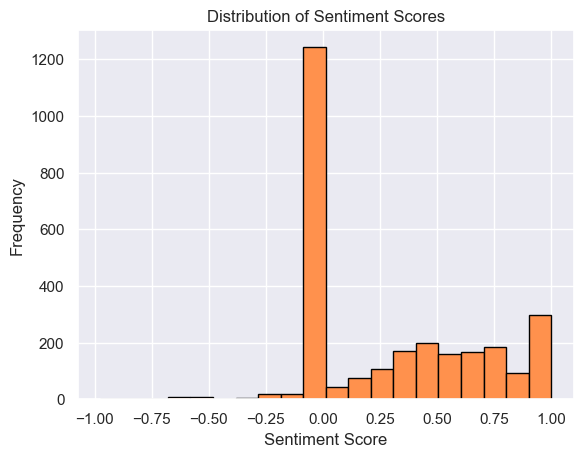

In [29]:
plt.hist(f["Sentiment_Score"], bins = 20, edgecolor = "black", color = "#ff914d")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores")
plt.show()

In [30]:
f.dropna(subset = ["cleaned_text"], inplace = True)

f.head(2)

displayName  starRating  \
0                       Cássio Trajano           5   
1  Danielle cristine faria de oliveira           5   

                                             comment  \
0  (Translated by Google) I'm there every beginni...   
1  (Translated by Google) Very beautiful and plea...   

                    createTime                   updateTime  \
0  2019-01-29T16:49:28.556676Z  2019-01-29T16:49:28.556676Z   
1  2019-01-28T14:40:59.180127Z  2019-01-28T14:40:59.180127Z   

                         reviewer_name                             review_id  \
0                       Cássio Trajano  ChdDSUhNMG9nS0VJQ0FnSURJdjktNTN3RRAB   
1  Danielle cristine faria de oliveira  ChdDSUhNMG9nS0VJQ0FnSURJbjdMczlRRRAB   

                                     before_original after_original  \
0  (Translated by Google) I'm there every beginni...       Original   
1  (Translated by Google) Very beautiful and plea...       Original   

                                        cleaned_text  Year  Sentiment_Score  
0  I'm there every beginning of the year I highly...  2019         0.030000  
1  Very beautiful and pleasant place. Breakfast a...  2019         0.911111

In [31]:
f.replace("nan", np.nan, inplace = True)

f.dropna(subset = ["cleaned_text"], inplace = True)

In [32]:
f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 0 to 2792
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   displayName      1648 non-null   object 
 1   starRating       1648 non-null   int64  
 2   comment          1648 non-null   object 
 3   createTime       1648 non-null   object 
 4   updateTime       1648 non-null   object 
 5   reviewer_name    1648 non-null   object 
 6   review_id        1648 non-null   object 
 7   before_original  1648 non-null   object 
 8   after_original   1613 non-null   object 
 9   cleaned_text     1648 non-null   object 
 10  Year             1648 non-null   object 
 11  Sentiment_Score  1648 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 167.4+ KB


In [33]:
f.tail(2)

displayName  starRating  \
2789               Fael Faul           5   
2792  Marcelo o empreendedor           5   

                                                comment  \
2789  (Translated by Google) Too good\n\n(Original)\...   
2792  (Translated by Google) The group played paintb...   

                    createTime                updateTime  \
2789  2018-01-21T21:24:40.996Z  2018-01-21T21:24:40.996Z   
2792  2018-01-20T15:32:53.260Z  2018-01-20T15:34:48.062Z   

               reviewer_name                             review_id  \
2789               Fael Faul  ChdDSUhNMG9nS0VJQ0FnSUNRLTU3UjNnRRAB   
2792  Marcelo o empreendedor  ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB   

                                        before_original after_original  \
2789               (Translated by Google) Too good\n\n(       Original   
2792  (Translated by Google) The group played paintb...       Original   

                                   cleaned_text  Year  Sentiment_Score  
2789                                   Too good  2018              0.7  
2792  The group played paintball, a lot of fun.  2018              0.3

# Experiment with Names and Gender

In [34]:
f["Name"] = f["displayName"].str.split().str[0]

f.tail(1)

displayName  starRating  \
2792  Marcelo o empreendedor           5   

                                                comment  \
2792  (Translated by Google) The group played paintb...   

                    createTime                updateTime  \
2792  2018-01-20T15:32:53.260Z  2018-01-20T15:34:48.062Z   

               reviewer_name                             review_id  \
2792  Marcelo o empreendedor  ChdDSUhNMG9nS0VJQ0FnSUNZaUtiLW1BRRAB   

                                        before_original after_original  \
2792  (Translated by Google) The group played paintb...       Original   

                                   cleaned_text  Year  Sentiment_Score  \
2792  The group played paintball, a lot of fun.  2018              0.3   

         Name  
2792  Marcelo

In [35]:
name_counts = f["Name"].value_counts()

name_counts_df = name_counts.reset_index()

name_counts_df.columns = ["Name", "frequency"]

name_counts_df.head(5)

Name  frequency
0      Ana         23
1  Marcelo         17
2  Rodrigo         16
3   Marcos         15
4   Rafael         14

In [36]:
name_counts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       930 non-null    object
 1   frequency  930 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.7+ KB


In [37]:
top_names = f["Name"].value_counts().index[:10] 

In [38]:
print(top_names)

Index(['Ana', 'Marcelo', 'Rodrigo', 'Marcos', 'Rafael', 'Paulo', 'Anderson',
       'Fernando', 'Maria', 'Luiz'],
      dtype='object', name='Name')


In [39]:
f["g_dec"] = f["Name"].apply(lambda x: gender.Detector().get_gender(x.split()[0]))

f["g_dec"] = f["g_dec"].apply(lambda x: x.lower() if x != 'unknown' else 'unknown')

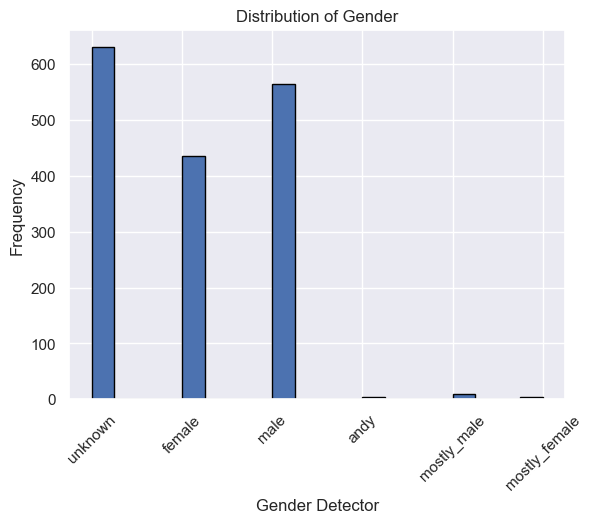

In [40]:
plt.hist(f["g_dec"], bins = 20, edgecolor = "black")
plt.xlabel("Gender Detector")
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

### Creating my own Dictionary

In [41]:
dictionary = {}

In [42]:
male = ['Marcelo', 'Rodrigo', 'Marcos', 'Rafael', 'Paulo', 'Anderson',
       'Fernando', 'Luiz','Felipe', 'Eduardo', 'Ricardo', 'José', 'Diego', 'Daniel', 'Guilherme', 
                 'Marcio', 'Tiago', 'Sergio', 'Leandro', 'Alex', 'Lucas', 'Thiago', 'Carlos', 
                 'Danilo', 'Pedro',  'Henrique', 'Luciano', 'Alexandre','Jose', 'Matheus',
                 'João', 'Bruno', 'Gustavo', 'Andre', 
                'Mauricio', 'Jorge', 'Vinicius', 'Vitor', 'Roberto',
       'Joao', 'Gilberto', 'Rogerio', 'Diogo',
       'Alan', 'Reinaldo', 'Renato', 'Douglas',
       'Claudio', 'Junior', 'Flavio', 'Leonardo', 'Adriano', 'Antonio',
                'Francisco', 'Gabriel', 'Wellington', 'Edson', 'Arthur', 'Denis', 'Luan',
                'paulo', 'David', 'carlos', 'Jefferson', 'jorge', 'Everton',
                'Ivan', 'Gil', 'Luis', 'Cristiano', 'Ailton', 'André', 'Robson', 
               'Kleber', 'Vanderlei', 'Adilson', 'Fábio', 'Kevin', 'Emerson', 'Marco', 'Mario',
               'Sidnei', 'Nilton', 'Rubens', 'nilson', 'DANIEL', 'Pablo','Márcio', 'Mateus', 'Roger',
                'Cicero', 'Samuel', 'Peterson', 'junior', 'Josue', 'Alessandro',
                'Dorival', 'eduardo', 'Humberto', 'Reginaldo', 'Mark', 'Anselmo', 'Juliano',
                'Elias', 'leandro', 'Yvan', 'antonio', 'Cleiton', 'Wilson', 'Cesar','Dimas', 'Washington',
                 'Moises', 'Silvio', 'Igor', 'Clayton', 'Sandro', 'Filipe', 'MARCOS',
                'Celso', 'Raul', 'Milo', 'Demetrius', 'Adailton', 'sandro', 'Manuel','William', 
                'sergio', 'Chiko', 'Flávio', 'alvarobaptista', 'Angelo', 'Joilson',
                'Giovane', 'Eneas', 'Serginho', 'Michel', 'Jacinto', 'Osmilton', 'Valdir', 
                'Magno', 'ALEXANDRE', 'Cleikson', 'HENRIQUE', 'JEAN', 'Fabiano',  'diego', 'Thomaz',
               'Yuji', 'andre', 'Dirceu', 'Wiliam', 'Giulian',
       'Oriomar', 'Renan', 'Fabrizio', 'Salvador', 'Wiliam',
       'Humana', 'Giulian', 'Walkiria', 'Nayon', 'Naiana', 'claudinei',
       'Yoshio', 'Victor', 'Edenilson', 'alan', 'Josafath',
       'Rivelino', 'Evaldo', 'Gercy', 'Giulliano', 'Marcony', 'Moisés', 'Elvio', 'Elson',
                'Juraci', 'Max', 'Robison', 'Claudemiro', 'SAMUKA', 'Jclaudio.',
                'Alecsandro', 'Gui', 'pedro', 'Alisson', 'Fabrício', 'ADOLFO',
                'Cássio', 'Zeca', 'Raimundo', 'Sebastião', 'ricardo',
       'Venildo', 'Celio', 'Ed', 'Gilmar', 'Jander', 'claudio', 'Reynaldo', 'arthur', 
                'josé', 'Denilson', 'Nelito', 'Charles', 'Valdeir', 'Arquimedes', 
                'Welinton', 'Marcello', 'martilho', 'Erik', 'renato', 'Vladimir', 'Guiarony', 'Osmair', 
       'Fernandinho', 'Cleyton','ISRAEL', 'ulisses', 'Aloisio', 'EMERSON', 'Éslei', 'Mano', 'robson',
       'Ivaldo', 'orlando', 'Ben', 'valmir',  'James', 'victor', 'Tales', 'denis', 'Mikéyas','marcelo', 
       'Wilton', 'Hiroki', 'Everson', 'Sidinei', 'Cleber', 'nivaldo', 'Higor',
       'Sândalo', 'marcio', 'Jhon', 'Ireldo', 'Gilson', 'cleiton', 'Marcus', 'claudenir',
       'JOSE', 'Alefe','sandrino', 'Leo', 'Giovani', 'Marconne',  'MUCIO', 'Wesley', 'rodney', 'alexandre',
       'Tom', 'Acácio', 'Marcao', 'Jonathan', 'Leonard','Almir', 'Moacir',
       'Hércules', 'Henry',  'Agnaldo','Christian', 'JeanZin', 'Claudinei', 'Milton', 'Andreas',  'Ademir', 
       'jose','Rubinho', 'Zé','Amaury' , 'Cláudio', 'Edevaldo','Claus', 'Kaique',  'Natan','Deivid',
       'Waldemir', 'Cleison',  'Arthursousa', 'EVANDERSON', 'Richard', 'Matias', 'PABLO', 'edison',
        'Aldemir','Edesio','JAMES', 'Wyctor', 
'ALLAN', 'Fred', 'Walter', 'Heitor', 'Isaias', 'rinaldo', 'julio',
'Cristhian', 'Ronald', 'Felipy', 'Adagilzon', 'rogerio', 'Tharles', 'izaquiel', 'Edvan',
'edson', 'Djalma','Alberto', 'sirLuis', 'mauricio','samuel','Rodolfo',
'Edmilson', 'Josenildo','Felippe', 'Sérgio', 'Ulisses', 'erico','wellington', 'emerson','Rafaelo','Jeanlucca',
        'Artur', 'Sidney', 'Emanuel','Jeferson', 'Lidio',  'Ivo', 'Clovis', 'Vinícius',
'Alexsandro', 'Luizinho',  'ednardo', 'josiel', 'helcio', 'Décio', 'ronaldo', 'Manoel', 'emidio', 
         'RICARDO', 'Enzo', 'Benedito', 'Jura', 'Léo', 'wagnerwja', 'mariolucio', 'ALEX', 'Ronaldo',
'Maicon', 'Thayron', 'Murillo', 'Gerson','tiaguinho', 'kayo', 'Marcola', 'GustavoTBR',
'Jairo', 'fabio', 'Jael', 'Everaldo', 'Elenildo','Brunojoaquim', 'Jomar',  'henrique',  'Jovani',
 'Cleberson', 'Murilo',   'Elcio', 'Raildo', 'william','Mauro', 'Heber',
 'Eliseu', 'Guto', 'wagner', 'IGOR', 'Rogério', 'Ralph','Feliks', 'willian',
'Eder', 'bruno', 'César', 'Jaime', 'Will', 'Waldires',  'gustavao0103',
'francisco', 'Fael', 'Josecarlos', 'Kauê', 'Fabio', 'Eladio']


In [43]:
top_names = f["Name"].value_counts().index[890:930] 
print(top_names)

Index(['josibele', 'Deley', 'wagner', 'IGOR', 'Donadelli', 'Deise', 'amor',
       'Cinthia', 'Limão', 'Iris', 'Anali', 'Nalva', 'Rogério', 'Ralph',
       'Aparecida', 'Ari', 'Itala', 'Vivi', 'fernanda', 'Feliks', 'willian',
       'Francielle', 'Iane', 'Gisele', 'Fabíola', 'Nilse', 'grecco', 'marcela',
       'Dorta', 'Tere', 'Eder', 'bruno', 'César', 'Jaime', 'Will', 'Waldires',
       'Genoveva', 'francisco', 'Estética', 'Fael'],
      dtype='object', name='Name')


In [44]:
female = ['Ana', 'Maria', 'Fernanda', 'Patricia', 'Simone', 'Vanessa', 'Sandra',
                'Daniela', 'Adriana', 'Juliana', 'Bruna', 'Renata', 'Elaine', 'Bianca',
       'Cristiane', 'Eliana', 'Luciana', 'Katia', 'Leticia', 'Aline', 'Paula', 'Angela', 
                 'Lilian', 'Michele', 'Thais', 'Cristina', 'Jaqueline', 'Naiana', 
                'Rose', 'Eliane', 'Erika', 'Amanda', 'Fabiana', 'Andreia', 'Marcia',
                'Vera', 'Alexandra', 'Marta', 'Ane', 'Priscila', 'Antonieta', 'sandra',
       'rosangela', 'Larissa', 'Valeria','Luana', 'Natalia', 'Mariana', 'Regina', 
               'Monica', 'Evelyn', 'Beatriz', 'Rosemeire', 'Roniele', 'Lia', 'Karem',
       'Carolina', 'Alessandra', 'Suelen', 'Sheila', 'Walkiria', 'AnaLucia', 'Sol', 
       'Milena', 'Rosana', 'Tania', 'silvana', 'Rosa', 'Sarah', 'Barbara', 
               'Rosangela', 'Kelly',  'Daisy', 'vanessa', 'Gislene', 'Marijara', 'Ayra',
       'Andrea', 'Débora', 'Vitória', 'Gabriela', 'CARLA', 'Andreza', 'Jandira', 'Laura', 
               'Letícia', 'Gislaine', 'Selma', 'Vivian', 'Michelle', 'Silvia', 'ana', 'Dayana', 
                 'Priscilla', 'Andressa', 'Edna', 'Debora',  'Lucia', 'Neuza',
       'Cecilia', 'Jenifer', 'Ivone','Ernani', 'Samantha', 'Keity', 'Vilma',
               'Joice', 'Vanda', 'Cláudia', 'Christiane',  'Samira', 'Márcia', 'Denise', 'Cibele',
                'Lucilene', 'Carla', 'Rebeca', 'Elizabeth', 'Bia',
               'Caroline', 'Dani', 'Mayara', 'Giovanna', 'Karla', 'Danielle', 'Camila', 'Gabi',
                'Abigail', 'Viviane','Marilda', 'Joslaine', 'jardiane', 'Marilene',
       'Elis', 'Katy', 'Mayelen', 'Helen', 'TALITA', 'Hellen', 'cristiane', 'Thamires', 
                'daniela', 'Magda', 'Jackeline', 'Anahy', 'Cintia', 'Taty', 'Cássia', 'sibele',
                'Pri', 'Danielly', 'Antonia', 'Zilma', 'JULIANA', 'Bárbara', 'Cleidiane', 'Jailma', 
                'maria', 'Kᴇʟʟʏ.', 'Ester', 'Roseley', 'Andréa', 'Jennifer', 'Juleine',
                'Phaola', 'marcelina', 'Iara', 'claudia', 'leodora', 'Tamires', 'graziela',
                'Roberta','Joyce', 'ANA', 'Josely',  'julianna', 'Raniery', 'Martha', 'Nicola',
         'Mary', 'Sonia', 'Lisandra', 'Laís', 'Elza', 'Paty', 'Virginia', 'Aneliza', 'Thayna', 'Luh',
        'Nair', 'Ariane', 'Desyrré', 'Jessilin', 'Angelina', 'Charlenne', 'Susan', 'DAIANNE',
         'Maribel', 'Roseli', 'Fátima', 'Elisete','Keila', 'Viviani', 'Gessica', 'Maiara', 'Kalianna',
         'SARA', 'Milla', 'Erica', 'Clayde', 'paula', 'lia', 'Irene', 'Daniele', 'Daiani',
         'Jessica', 'Lucielma', 'josy', 'Ágata', 'vilma', 'Nazinha', 'Rayssa', 'Juliane', 'Marili',
         'patricia', 'Su', 'Josirlei',  'Tamar', 'Lucineia', 'Mislene', 'gabi','Betty','Thianne',
        'Ellen', 'Cleide', 'Clarice', 'Analia', 'Karen', 'Suh', 'Saahh', 'Angélica',
         'Kátia', 'Ligia', 'michele', 'Claudineia', 'Estefane', 'fabiola', 'sonia',
       'Ariele', 'Anita', 'Katiuscia',  'eleni', 'Elizandra', 'Safira', 'Tanyse', 
          'Rosely', 'Elisabeth', 'Sueli',  'Janaina', 'Jéssica', 'Joelma', 'Julia',
          'Suellen', 'Rosimeyre', 'Rosecléia', 'Elisandra',  'Nádia', 'jussara', 'elisangela',
         'isabel',  'Shirley', 'Steff',  'Bel', 'Sabrina',
         'nica', 'Fabiola',   'Khethulley',  'dilma',  'Marcella', 'Tamiris', 
         'Denilda', 'Cleuza', 'Mirella', 'Suely', 'Leila', 'Celia',  'Tatiana', 'Margareth', 'Silvana',
'Marlene', 'Michely', 'Cátia', 'Thays',
         'Lindineide',  'Thainara', 'Camile', 'Andreildes', 'Tânia',   'IVONETE',
         'Elliethy',  'Zilda', 'rejane',  'Giselle', 'Solange', 'Dreicy',   'Cleovania', 'Bruna,',
         'Andrielle', 'Fran', 'Ines',  'Soraya', 'Ivanilda', 'nadir', 
 'Dai', 'Roseneti','Ivete', 'Rene', 'Helena',
'sabrina',  'Duda', 'Marcele',  'Nicole','Grazielle','Jéssika',  'Jayza','Raquel', 'Conceição', 
         'Elisangela', 'SUELI', 'Jorlanda', 'Ketury', 
 'Maryah', 'Jeniffer', 'monalisa','Luciane', 'Stefanya', 'Heloisa', 'Zenilce',
'Nathalia',  'Lari',  'Milene',  'Jussara', 'Neurimar', 'JaqueGS2', 'amanda',
'Rosemary', 'Li', 'nice', 'Gabriella','Keli',  'Marcela',  'Heloísa',
 'Zazá', 'Rafaella', 'Eunice', 'priscila', 'Rita',  'Elizabete', 'Tatiane',
'Miriam',  'Lorena',   'Joara','Queila','Michela', 'Neide',
 'Liliana', 'Pamela', 'Tayná', 
'josibele',    'Deise', 'Cinthia',  'Iris', 'Anali', 'Nalva', 
'Aparecida', 'Ari', 'Itala', 'Vivi', 'fernanda', 'Francielle', 'Iane', 'Gisele', 'Fabíola', 
          'Nilse', 'marcela','Tere', 'Genoveva', 'Laura.mantia', 'Vânia', 'Lara', 
          'Agatha', 'EDileuza', 'Tércia', ]


In [45]:
unknown = [ 'Prof.',  'J', 'DeH', 'WRS', 'Cheiro',
                'doutor', 'Andy', 'G.L', 'Dione', 'Rudi', 'Humana',
                'Nayon', 'Ribeiro', 'Floripes', 'CRITICAL',
       'Sensei', 'Assis',  'Ribs', 'Mendes', 'Pr.Pierre', 'Pamoreninha',
                'Leme', 'SEX', 'jubs', 'Sherlon', 'Ianne', 'M.9', 'Canal',
                'Lefagon', 'REGUEZA', 'Alves', 'Acampando', 'skank566', 'novo', 'Favero', 
          'Sorae', 'Re2014', 'Ferry', 'REMAX', 'Laleska', 'arimatel', 'RR', 'viajeagoracomigo',
          'Rovessa', 'Ulrich', 'Fiat', 'megbkubo', 'Thebaskoo', 'Magaiver', 'Vigia',
          'Fatinanzi',  'H', 'Herdine', 'SIMIONATO', "Mircas001's", 'Oede', 'kellybellon',
       'Galdino', 'Dr.', 'Noedirf', 'FAMÍLIA', 'ARROW', 'Altairjoao', '#chji',
          'Jan', 'APBL', 'Rubaiyat', 'silvia','Taike', 'Anayan',  'F', 'Animaker', 'Salatir', 'Edi',
           'Família','SHIRÁ','Juart', 'O', 'Stam', 'Motofaturca','Orlandini','Volei', 'VIVENDO', '·','Martin', 
           'Thairony', 'Arquiteto',  'E', 'POLACKA','Psicóloga', 'Izah','Sem', 
           'Aventura','Pezão77','Cheirinho', 'Dan',
'HotRed','Feul', 'Sushine', 'Kielblock',  'Luck', 'Eu', 'Arthdrone', 'Chandra',
          'Rawesller','MONY2020','Crist', 'Fuji', 'Yco',  'Kombi', 'ANICETO','Micha_ex','Aldeia',
'Cozinha', 'Pai','Iam','Dilca', 'Wangri','BARBOSA','Deley','Donadelli','amor',
'Limão', 'grecco','Dorta', 'snebur'] 

In [46]:
business = ['Auto','MOTORLIFE', 'body-guard', 'SMTPRINTER', 'Studio',
                'DCriartes', 'Games', 'Crossover', 'Idiarte', 'ICM', 'Mexida_parts',
           'Turismo', 'INTERPLACE', 'Centro', 'Personal','Estética'] 

In [47]:
for name in male:
    dictionary[name] = "male"

for name in female:
    dictionary[name] = "female"

for name in unknown:
    dictionary[name] = "unknown"
    
for name in business:
    dictionary[name] = "business"

In [48]:
gender = pd.DataFrame([(name, gender) for name, gender in dictionary.items()], columns = ["Name", "Gender"])
gender.tail(1)

Name    Gender
929  Estética  business

In [49]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    930 non-null    object
 1   Gender  930 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


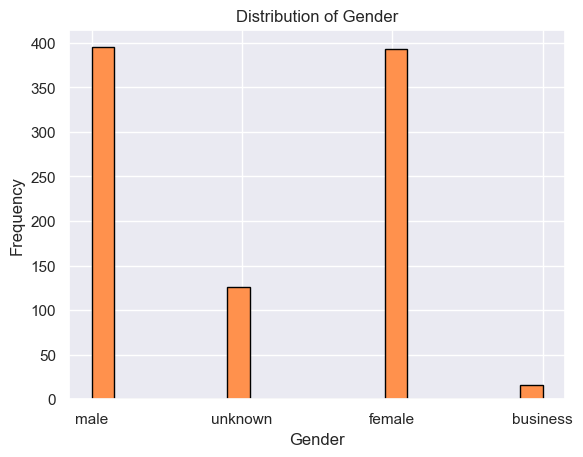

In [50]:
plt.hist(gender["Gender"], bins = 20, edgecolor = "black", color = "#ff914d")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

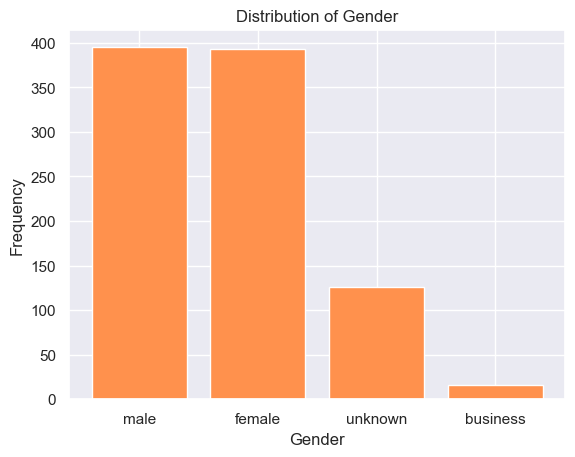

In [51]:
plt.bar(gender["Gender"].value_counts().index, gender["Gender"].value_counts(), 
        color = "#ff914d")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

In [52]:
gender["Gender"].value_counts()

Gender
male        395
female      393
unknown     126
business     16
Name: count, dtype: int64

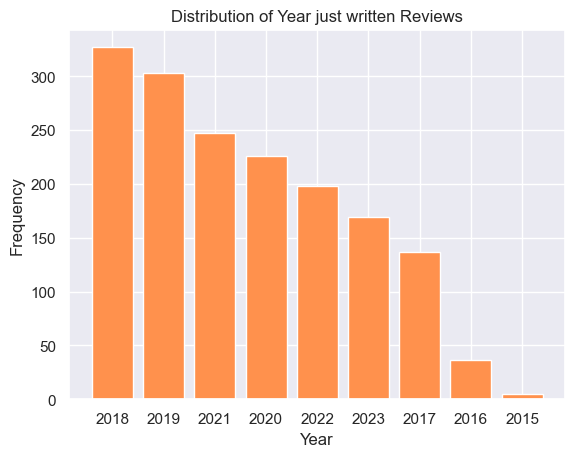

In [53]:
plt.bar(f["Year"].value_counts().index, f["Year"].value_counts(), 
        color = "#ff914d")

plt.xlabel("Year")
plt.ylabel("Frequency")
plt.title("Distribution of Year just written Reviews")
plt.show()

In [54]:
f["Year"].value_counts()

Year
2018    327
2019    303
2021    247
2020    226
2022    198
2023    169
2017    137
2016     36
2015      5
Name: count, dtype: int64

In [55]:
test = pd.merge(f, gender, on = "Name", how = "inner")

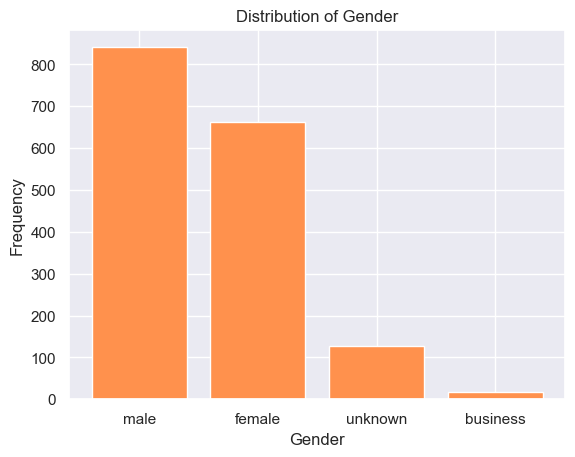

In [56]:
plt.bar(test["Gender"].value_counts().index, test["Gender"].value_counts(), 
        color = "#ff914d")

#plt.xticks(range (1, 5, 1))

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Distribution of Gender")
plt.show()

In [57]:
test["Gender"].value_counts()

Gender
male        841
female      662
unknown     128
business     17
Name: count, dtype: int64

In [58]:
gender_mapping = {"male": 1, "female": 2, "unknown": 3, "business": 4}

test["Gender_Numeric"] = test["Gender"].map(gender_mapping)

In [59]:
contingency_table = pd.crosstab(test["starRating"], test["Gender"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 36.08890664680208
p-value: 0.00031350214027014544
Degrees of freedom: 12
Expected frequencies: [[4.33252427e-01 1.68713592e+01 2.14332524e+01 3.26213592e+00]
 [3.30097087e-01 1.28543689e+01 1.63300971e+01 2.48543689e+00]
 [7.83980583e-01 3.05291262e+01 3.87839806e+01 5.90291262e+00]
 [2.88834951e+00 1.12475728e+02 1.42888350e+02 2.17475728e+01]
 [1.25643204e+01 4.89269417e+02 6.21564320e+02 9.46019417e+01]]


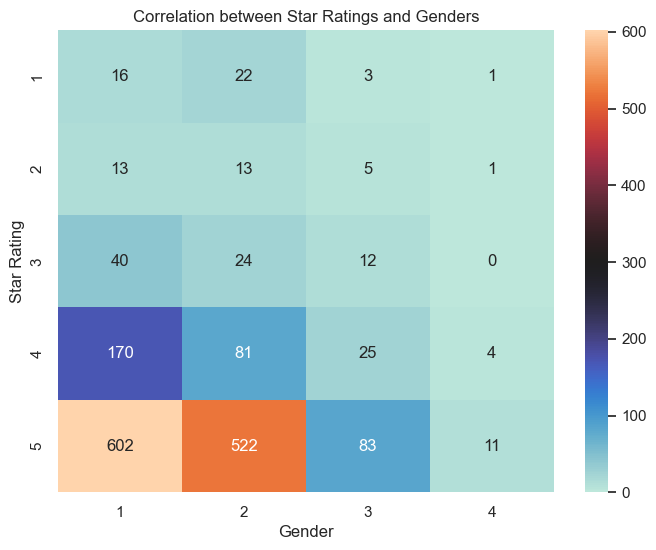

In [60]:
contingency_table = pd.crosstab(test["starRating"], test["Gender_Numeric"])

plt.figure(figsize = (8, 6))
sns.heatmap(contingency_table, annot = True, fmt = 'd', cmap =   "icefire", cbar = True)

#"viridis" "YlOrBr" "Blues"

plt.xlabel("Gender")
plt.ylabel("Star Rating")
plt.title("Correlation between Star Ratings and Genders")
plt.show()

In [61]:
contingency_table = pd.crosstab(test["starRating"], test["Year"])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 69.40745913499734
p-value: 0.000140954562468193
Degrees of freedom: 32
Expected frequencies: [[1.27427184e-01 9.17475728e-01 3.49150485e+00 8.33373786e+00
  7.72208738e+00 5.75970874e+00 6.29490291e+00 5.04611650e+00
  4.30703883e+00]
 [9.70873786e-02 6.99029126e-01 2.66019417e+00 6.34951456e+00
  5.88349515e+00 4.38834951e+00 4.79611650e+00 3.84466019e+00
  3.28155340e+00]
 [2.30582524e-01 1.66019417e+00 6.31796117e+00 1.50800971e+01
  1.39733010e+01 1.04223301e+01 1.13907767e+01 9.13106796e+00
  7.79368932e+00]
 [8.49514563e-01 6.11650485e+00 2.32766990e+01 5.55582524e+01
  5.14805825e+01 3.83980583e+01 4.19660194e+01 3.36407767e+01
  2.87135922e+01]
 [3.69538835e+00 2.66067961e+01 1.01253641e+02 2.41678398e+02
  2.23940534e+02 1.67031553e+02 1.82552184e+02 1.46337379e+02
  1.24904126e+02]]


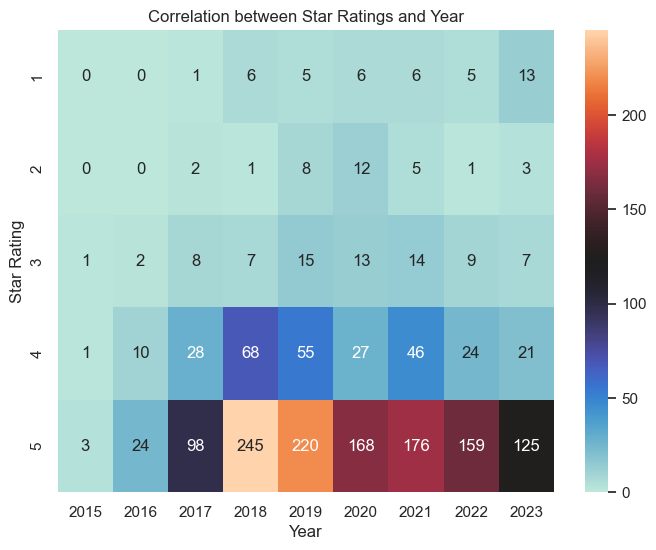

In [62]:
contingency_table = pd.crosstab(test["starRating"], test["Year"])

plt.figure(figsize = (8, 6))
sns.heatmap(contingency_table, annot = True, fmt = "d", cmap =   "icefire", cbar = True)

#"viridis" "YlOrBr" "Blues"

plt.xlabel("Year")
plt.ylabel("Star Rating")
plt.title("Correlation between Star Ratings and Year")
plt.show()

In [63]:
contingency_table

Year        2015  2016  2017  2018  2019  2020  2021  2022  2023
starRating                                                      
1              0     0     1     6     5     6     6     5    13
2              0     0     2     1     8    12     5     1     3
3              1     2     8     7    15    13    14     9     7
4              1    10    28    68    55    27    46    24    21
5              3    24    98   245   220   168   176   159   125

In [64]:
one_star_reviews = test.loc[test["starRating"] == 1]

In [65]:
one_star_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2 to 1590
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   displayName      42 non-null     object 
 1   starRating       42 non-null     int64  
 2   comment          42 non-null     object 
 3   createTime       42 non-null     object 
 4   updateTime       42 non-null     object 
 5   reviewer_name    42 non-null     object 
 6   review_id        42 non-null     object 
 7   before_original  42 non-null     object 
 8   after_original   42 non-null     object 
 9   cleaned_text     42 non-null     object 
 10  Year             42 non-null     object 
 11  Sentiment_Score  42 non-null     float64
 12  Name             42 non-null     object 
 13  g_dec            42 non-null     object 
 14  Gender           42 non-null     object 
 15  Gender_Numeric   42 non-null     int64  
dtypes: float64(1), int64(2), object(13)
memory usage: 5.6+ KB


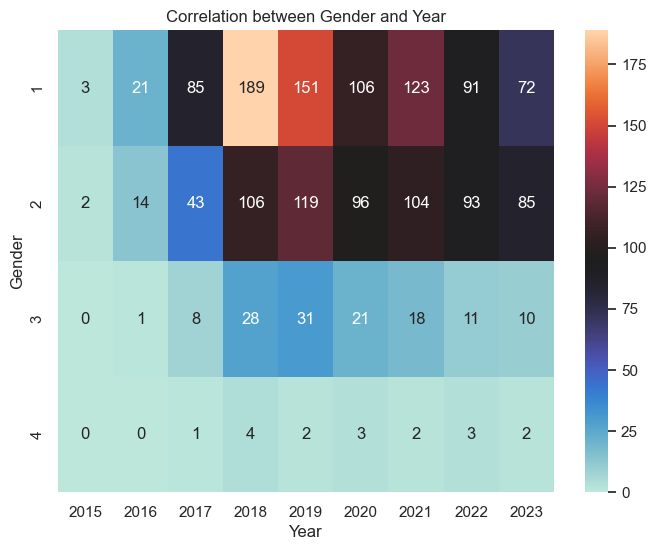

In [66]:
contingency_table = pd.crosstab(test["Gender_Numeric"], test["Year"])


plt.figure(figsize = (8, 6))
sns.heatmap(contingency_table, annot = True, fmt = "d", cmap =   "icefire", cbar = True)

#"viridis" "YlOrBr" "Blues"

plt.xlabel("Year")
plt.ylabel("Gender")
plt.title("Correlation between Gender and Year")
plt.show()

In [67]:
contingency_table

Year            2015  2016  2017  2018  2019  2020  2021  2022  2023
Gender_Numeric                                                      
1                  3    21    85   189   151   106   123    91    72
2                  2    14    43   106   119    96   104    93    85
3                  0     1     8    28    31    21    18    11    10
4                  0     0     1     4     2     3     2     3     2

In the last two years the women started to be the majority on the written reviews

In [68]:
table_values = contingency_table.values

value_list = table_values.tolist()

print(value_list)

[[3, 21, 85, 189, 151, 106, 123, 91, 72], [2, 14, 43, 106, 119, 96, 104, 93, 85], [0, 1, 8, 28, 31, 21, 18, 11, 10], [0, 0, 1, 4, 2, 3, 2, 3, 2]]


In [69]:
M = [3, 21, 85, 189, 151, 106, 123, 91, 72]
F = [2, 14, 43, 106, 119, 96, 104, 93, 85]
U = [0, 1, 9, 29, 31, 21, 18, 11, 10]
B = [0, 0, 0, 3, 2, 3, 2, 3, 2]

Y15 = list(map(lambda x: x[0], [M, F, U, B]))
Y16 = list(map(lambda x: x[1], [M, F, U, B]))
Y17 = list(map(lambda x: x[2], [M, F, U, B]))
Y18 = list(map(lambda x: x[3], [M, F, U, B]))
Y19 = list(map(lambda x: x[4], [M, F, U, B]))
Y20 = list(map(lambda x: x[5], [M, F, U, B]))
Y21 = list(map(lambda x: x[6], [M, F, U, B]))
Y22 = list(map(lambda x: x[7], [M, F, U, B]))
Y23 = list(map(lambda x: x[8], [M, F, U, B]))

print(Y15)

[3, 2, 0, 0]


In [70]:
M = [3, 21, 85, 189, 151, 106, 123, 91, 72]
F = [2, 14, 43, 106, 119, 96, 104, 93, 85]
U = [0, 1, 9, 29, 31, 21, 18, 11, 10]
B = [0, 0, 0, 3, 2, 3, 2, 3, 2]

all_lists = [M, F, U, B]

first_elements = list(map(lambda x: x[0], all_lists))

sum_first_elements = sum(first_elements)

results = list(map(lambda x: x / sum_first_elements, first_elements))

print("Results:", results)

Results: [0.6, 0.4, 0.0, 0.0]


In [71]:
def calculate_ratios(*lists):
    
    results = []

    
    for i in range(9):
        
        elements = [lst[i] for lst in lists]
        
        sum_elements = sum(elements)
        
        ratios = [elem / sum_elements if sum_elements != 0 else 0 for elem in elements]
        
        results.append(ratios)

    return results

M = [3, 21, 85, 189, 151, 106, 123, 91, 72]
F = [2, 14, 43, 106, 119, 96, 104, 93, 85]
U = [0, 1, 9, 29, 31, 21, 18, 11, 10]
B = [0, 0, 0, 3, 2, 3, 2, 3, 2]

results = calculate_ratios(M, F, U, B)

for i, ratios in enumerate(results):
    print(f"Ratios for element {i}: {ratios}")

Ratios for element 0: [0.6, 0.4, 0.0, 0.0]
Ratios for element 1: [0.5833333333333334, 0.3888888888888889, 0.027777777777777776, 0.0]
Ratios for element 2: [0.6204379562043796, 0.31386861313868614, 0.06569343065693431, 0.0]
Ratios for element 3: [0.5779816513761468, 0.3241590214067278, 0.08868501529051988, 0.009174311926605505]
Ratios for element 4: [0.49834983498349833, 0.3927392739273927, 0.10231023102310231, 0.006600660066006601]
Ratios for element 5: [0.4690265486725664, 0.4247787610619469, 0.09292035398230089, 0.01327433628318584]
Ratios for element 6: [0.4979757085020243, 0.42105263157894735, 0.0728744939271255, 0.008097165991902834]
Ratios for element 7: [0.4595959595959596, 0.4696969696969697, 0.05555555555555555, 0.015151515151515152]
Ratios for element 8: [0.4260355029585799, 0.5029585798816568, 0.05917159763313609, 0.011834319526627219]


In [72]:
test["Year"].value_counts()

Year
2018    327
2019    303
2021    247
2020    226
2022    198
2023    169
2017    137
2016     36
2015      5
Name: count, dtype: int64

https://matplotlib.org/stable/gallery/color/named_colors.html

https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

https://seaborn.pydata.org/tutorial/color_palettes.html

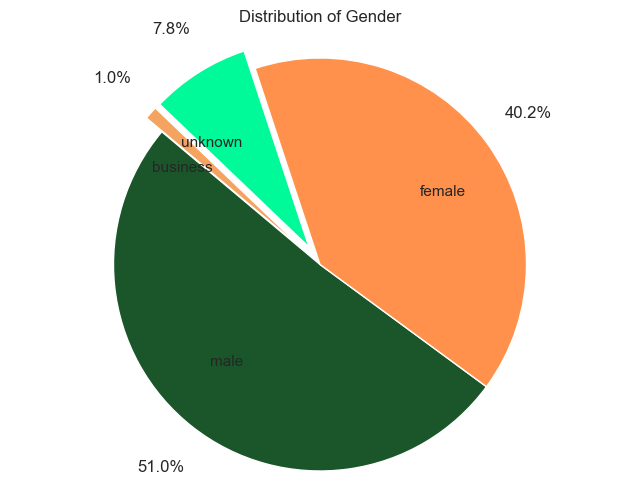

In [73]:
plt.figure(figsize = (8, 6))
explode = (0, 0, 0.1, 0.1)

plt.pie(test["Gender"].value_counts(), labels = test["Gender"].unique(),
        autopct = '%1.1f%%', startangle = 140, 
        pctdistance = 1.25, labeldistance = 0.6,
        explode = explode,
       colors = ["#1a562a",  "#ff914d", "mediumspringgreen", "sandybrown"])



plt.axis("equal") 
plt.title("Distribution of Gender")
plt.show()

https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py

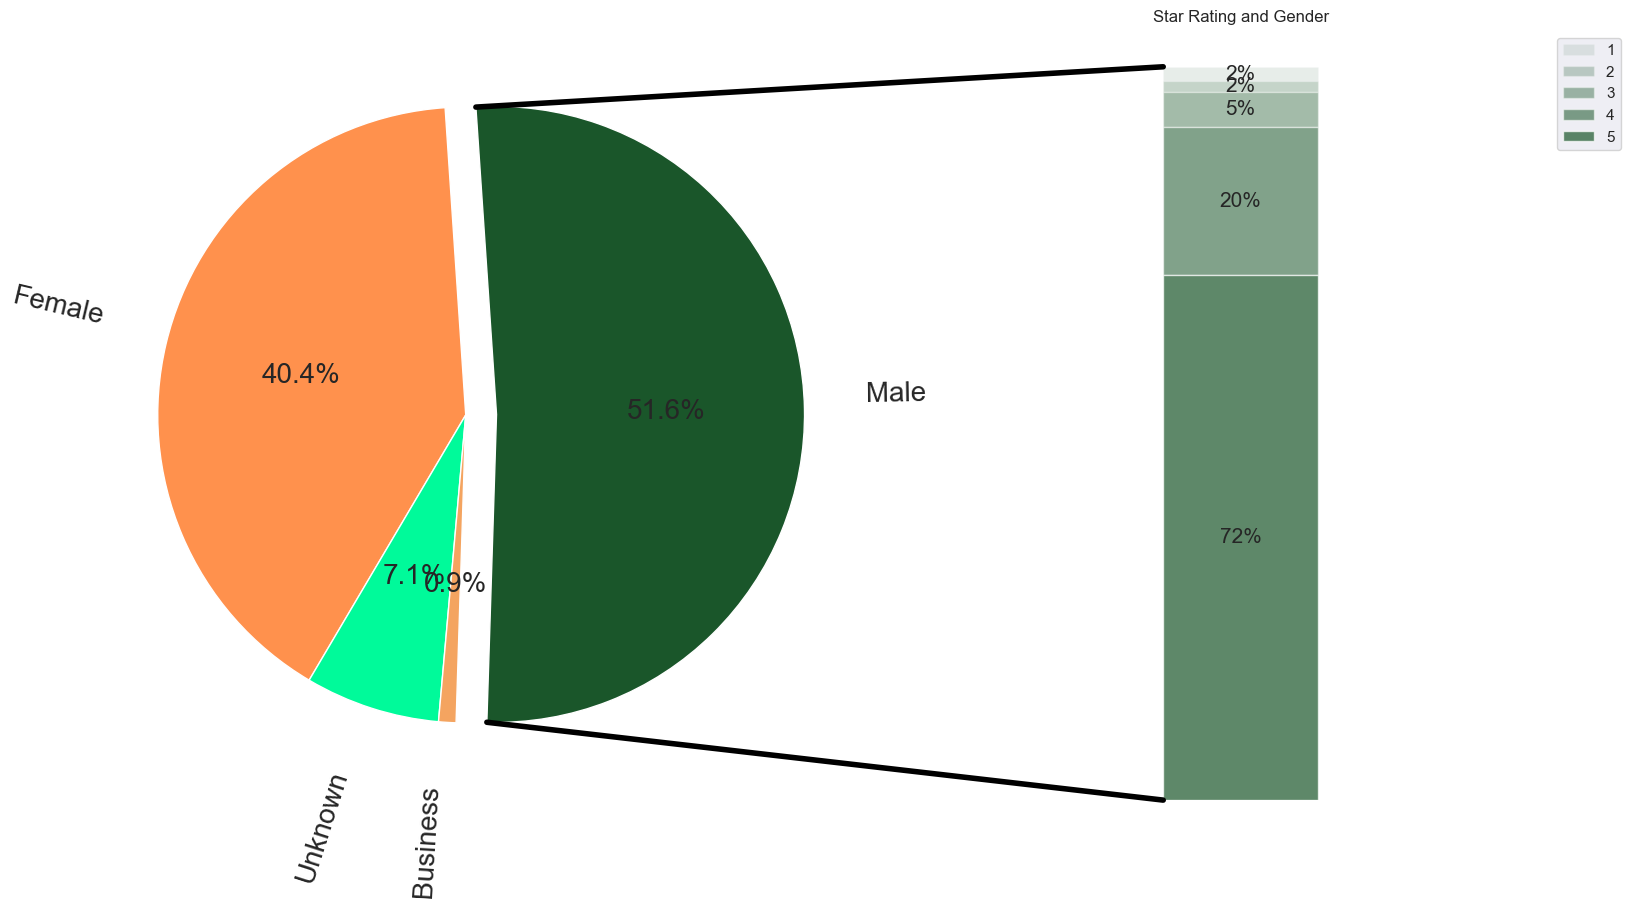

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.subplots_adjust(wspace = 0)


overall_ratios = [0.51, 0.40, 0.07, 0.009]
labels = ["Male", "Female", "Unknown", "Business"]
explode = [0.1, 0, 0, 0]
colors = ["#1a562a",  "#ff914d", "mediumspringgreen", "sandybrown"]

angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct = '%1.1f%%', pctdistance = 0.55,
                     startangle = angle,
                     labels = labels, explode = explode, rotatelabels = True, 
                    colors = colors, labeldistance = 1.2, textprops = {"fontsize": 20})
plt.rcParams["font.size"] = 15


star_ratios = [0.7158, 0.2021, 0.0475, 0.0154, 0.0190]
star_labels = ["5", "4", "3", "2", "1"]
bottom = 1
width = .2


for j, (height, label) in enumerate(reversed([*zip(star_ratios, star_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom = bottom,
                 color = "#1a562a", label = label,
                 alpha = 0.1 + 0.15 * j)
    ax2.bar_label(bc, labels = [f"{height:.0%}"], label_type = "center")
    

ax2.set_title("Star Rating and Gender")
ax2.legend()
ax2.axis("off")
ax2.set_xlim(- 2.5 * width, 2.5 * width)


theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(star_ratios)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width / 2, 0), coordsA = ax2.transData,
                      xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

#### year 2018

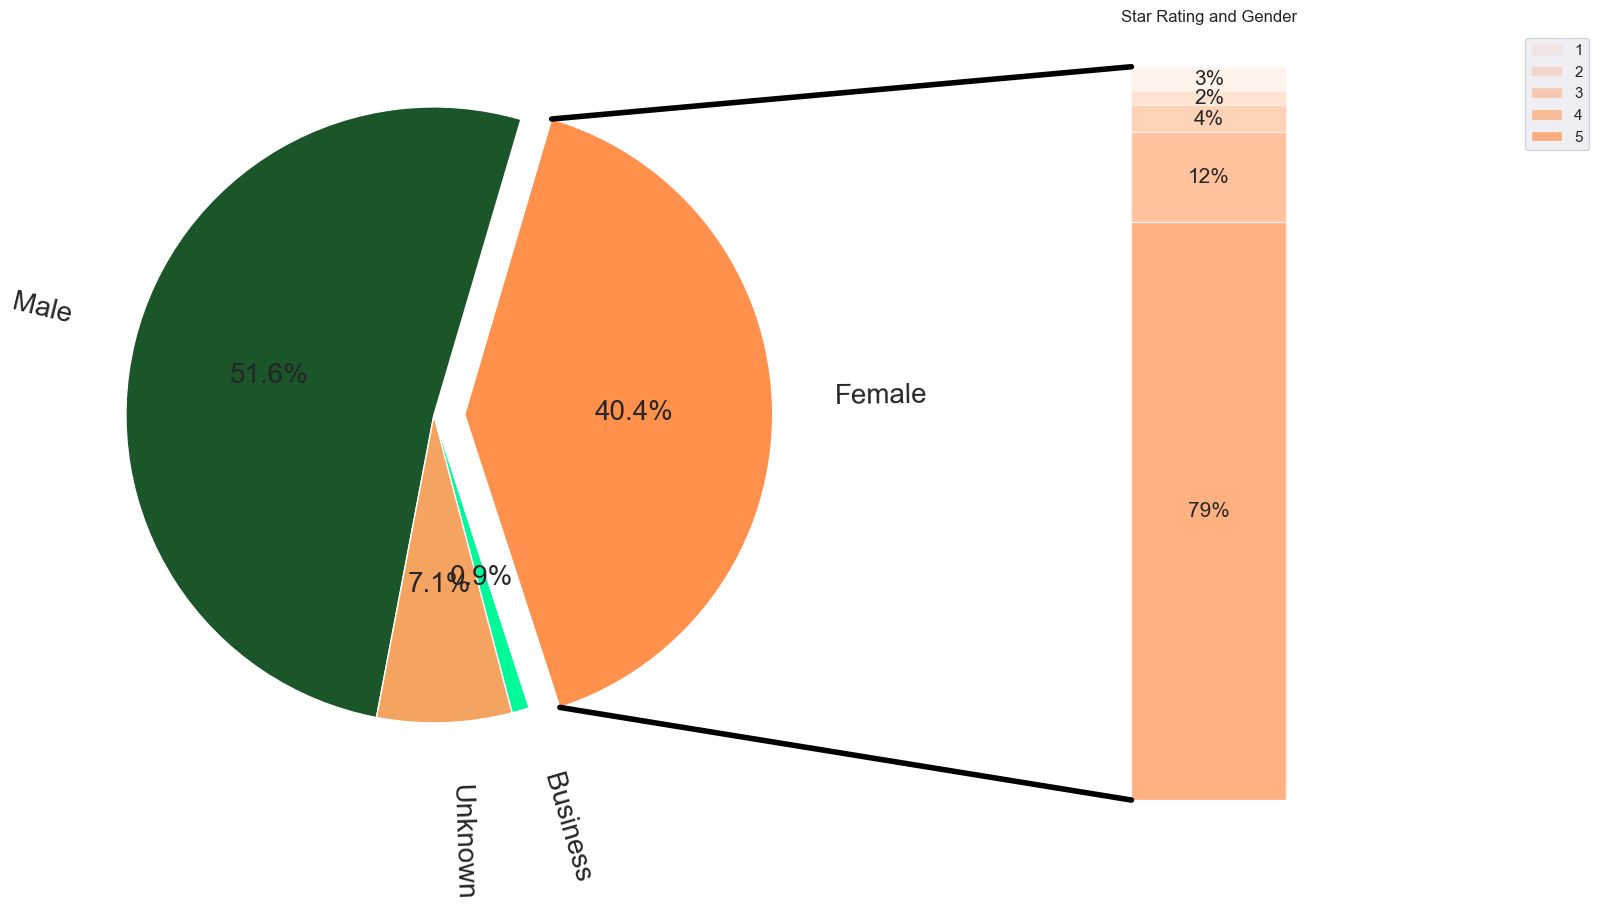

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10))
fig.subplots_adjust(wspace = 0)


overall_ratios = [0.40, 0.51, 0.07, 0.009]
labels = [ "Female", "Male", "Unknown", "Business"]
explode = [0.1, 0, 0, 0]
colors = ["#ff914d", "#1a562a", "sandybrown", "mediumspringgreen"]

angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct = '%1.1f%%', pctdistance = 0.55,
                     startangle = angle,
                     labels = labels, explode = explode, rotatelabels = True, 
                    colors = colors, labeldistance = 1.2, textprops = {"fontsize": 20})
plt.rcParams["font.size"] = 15


star_ratios = [0.7885, 0.1223, 0.0362, 0.0196, 0.0332]
star_labels = ["5", "4", "3", "2", "1"]
bottom = 1
width = .2


for j, (height, label) in enumerate(reversed([*zip(star_ratios, star_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom = bottom,
                 color = "#ff914d", label = label,
                 alpha = 0.1 + 0.15 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type = "center")
    

ax2.set_title("Star Rating and Gender")
ax2.legend()
ax2.axis("off")
ax2.set_xlim(- 2.5 * width, 2.5 * width)


theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(star_ratios)

x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA = (-width / 2, 0), coordsA = ax2.transData,
                      xyB = (x, y), coordsB = ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

# Text Preprocessing 

In [76]:
ct = test[["starRating", "Gender", "Gender_Numeric", "Year", "cleaned_text", "Sentiment_Score"]]

In [77]:
ct.head()

starRating  Gender  Gender_Numeric  Year  \
0           5    male               1  2019   
1           5  female               2  2019   
2           1  female               2  2019   
3           5    male               1  2019   
4           5    male               1  2019   

                                        cleaned_text  Sentiment_Score  
0  I'm there every beginning of the year I highly...         0.030000  
1  Very beautiful and pleasant place. Breakfast a...         0.911111  
2  I thought it was horrible. The location is not...        -0.073333  
3             One of the best canpings in the region         1.000000  
4  Family place but I found things on site expens...        -0.500000

In [78]:
ct.loc[:, "word_count"] = ct["cleaned_text"].apply(lambda x: len(str(x).split(" ")))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/300173701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct.loc[:, "word_count"] = ct["cleaned_text"].apply(lambda x: len(str(x).split(" ")))


In [79]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                           cleaned_text  Sentiment_Score  \
1643                               Very pleasant!!!!🙌🙌🙌         0.200000   
1644  I only have one complaint:\nThe place is great...         0.233333   
1645                              Crowded.....but good!         0.875000   
1646                                                Top         0.500000   
1647                                           Too good         0.700000   

      word_count  
1643           2  
1644          20  
1645           2  
1646           1  
1647           2

In [80]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

ct.loc[:, "avg_word"] = ct["cleaned_text"].apply(lambda x: avg_word(x))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/1607413029.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct.loc[:, "avg_word"] = ct["cleaned_text"].apply(lambda x: avg_word(x))


In [81]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                           cleaned_text  Sentiment_Score  \
1643                               Very pleasant!!!!🙌🙌🙌         0.200000   
1644  I only have one complaint:\nThe place is great...         0.233333   
1645                              Crowded.....but good!         0.875000   
1646                                                Top         0.500000   
1647                                           Too good         0.700000   

      word_count   avg_word  
1643           2   9.500000  
1644          20   3.714286  
1645           2  10.000000  
1646           1   3.000000  
1647           2   3.500000

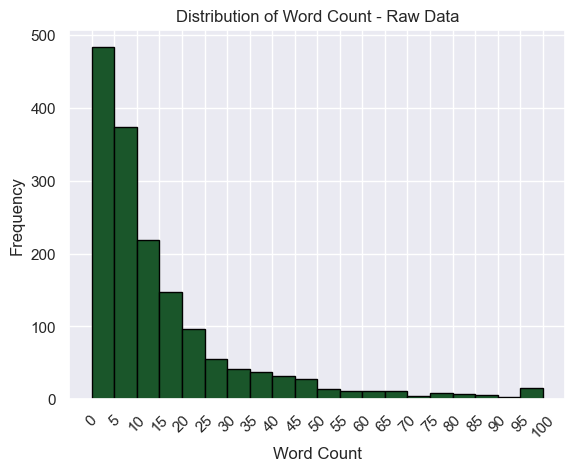

In [82]:
plt.hist(ct["word_count"], bins = 20, range=(0, 100), edgecolor = 'black', color = "#1a562a",
          align = "mid")

plt.xlabel("Word Count")
plt.xticks(range(0, 100 + 1, 5))
plt.xticks(rotation = 45)
plt.ylabel("Frequency")
plt.title("Distribution of Word Count - Raw Data")

plt.show()

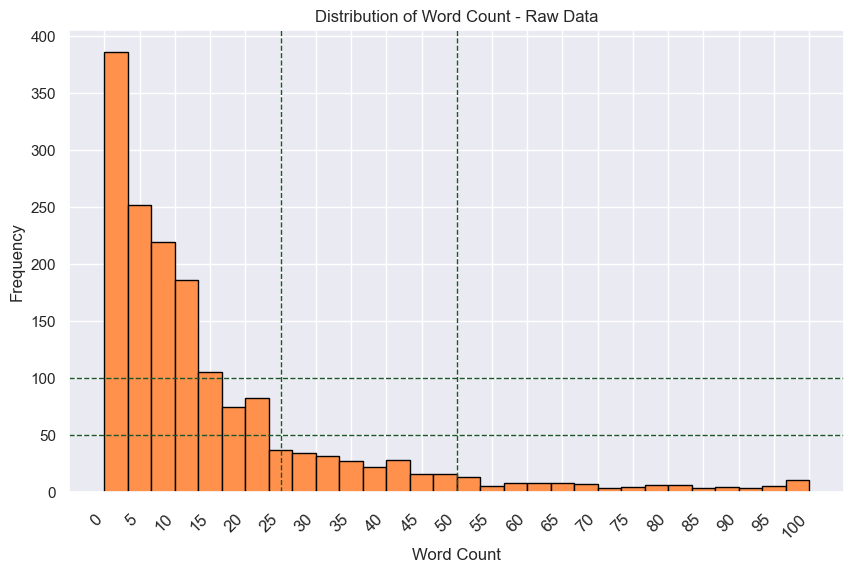

In [83]:
plt.figure(figsize = (10, 6))

plt.hist(ct["word_count"], bins = 30, range = (0, 100), 
         edgecolor = "black", color = "#ff914d", align = "mid")

plt.axvline(x = 25, linewidth = 1, color = "#1a562a", linestyle = "--")
plt.axvline(x = 50, linewidth = 1, color = "#1a562a", linestyle = "--")

plt.axhline(y = 50, linewidth = 1, color = "#1a562a", linestyle = "--")
plt.axhline(y = 100, linewidth = 1, color = "#1a562a", linestyle = "--")

plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count - Raw Data")


plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.xticks(range(0, 100 + 1, 5))
plt.gca().tick_params(axis = "x", pad = 8) 

plt.show()

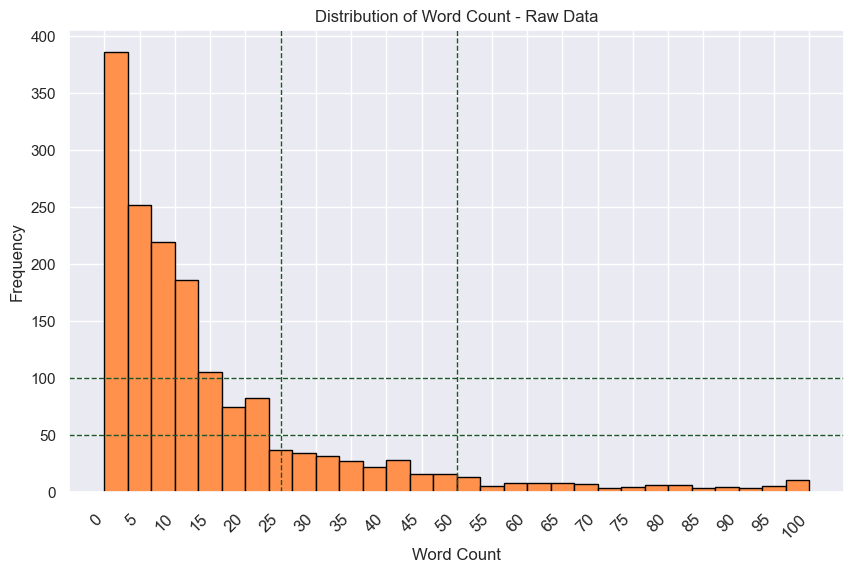

In [84]:
plt.figure(figsize=(10, 6))

plt.hist(ct["word_count"], bins = 30, range=(0, 100), 
         edgecolor = "black", color = "#ff914d", align = "mid")

plt.axvline(x = 25, linewidth = 1, color = "#1a562a", linestyle = "--")
plt.axvline(x = 50, linewidth = 1, color = "#1a562a", linestyle = "--")

plt.axhline(y = 50, linewidth = 1, color = "#1a562a", linestyle = "--")
plt.axhline(y = 100, linewidth = 1, color = "#1a562a", linestyle = "--")

plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Count - Raw Data")


plt.xticks(rotation = 45, ha = "right", fontsize = 12)
plt.xticks(range(0, 100 + 1, 5))
plt.gca().tick_params(axis = "x", pad = 8) 
plt.show()

In [85]:
ct.tail(1)

starRating Gender  Gender_Numeric  Year cleaned_text  Sentiment_Score  \
1647           5   male               1  2018     Too good              0.7   

      word_count  avg_word  
1647           2       3.5

In [86]:
text_data = ct["cleaned_text"]

vectorizer = CountVectorizer()

word_counts = vectorizer.fit_transform(text_data)

words = vectorizer.get_feature_names_out()

num_unique_words = len(words)

print("Number of unique words:", num_unique_words)

Number of unique words: 2647


In [87]:
combined_text = ' '.join(ct["cleaned_text"])

tokens = nltk.word_tokenize(combined_text)

ptext1 = Text(tokens)

ptext1.concordance("highly")

Displaying 25 of 50 matches:
there every beginning of the year I highly recommend the chalets food entertai
y family and I love everything .. I highly recommend .. Great Great Very famil
t and top food . Great location ! I highly recommend . Show Very clean and org
iful place to relax A great place ! highly recommend I 've always liked this c
 to rest . And fun for the kids . I highly recommend it . Our fifth visit . Wo
acular service , and tasty food . I highly recommend . I did n't go and I wo n
well served good food Very good , I highly recommend it Wonderful place to res
Family environment and very green . highly recommended Camping Area ⛺️ note 10
r prices , this is the campsite , I highly recommend it ... Very good , I spen
ul place to spend your holidays . I highly recommend it ! I had a wonderful ex
onderful . Congratulations 👏🏾👏🏾🌹😍 I highly recommend it 👍🏾 Paradise does exist
he whole family , Beautiful place I highly recommend it . The cleanliness in a
wimming pools ... Beaut

In [88]:
combined_text = ' '.join(ct["cleaned_text"])

tokens = nltk.word_tokenize(combined_text)

ptext1 = Text(tokens)

ptext1.concordance("horrible")

Displaying 12 of 12 matches:
d are delicious . I thought it was horrible . The location is not that much fo
 a little loose , the barbecue was horrible . I do not recommend this chalet .
ok . Wonderful food and leisure .. Horrible wooden chalet .. Hot .. Small .. A
nd when I send a message again ... horrible service Wonderful place exceeded m
o it quickly , but the lighting is horrible . I found it strange because I sta
s that the contact via WhatsApp is horrible , I sent a message several times t
staurant on the site terrible food horrible the salad was sour one of the ones
desired was the mattress which was horrible and the swimming pool as I was wit
tion was very difficult . It was a horrible feeling and once again , WE DID N'
ked it ! ! But the fishing logo is horrible , the service is terrible the owne
he whole family The experience was horrible ... I filed a complaint and I 'm s
ching a tent in a sloping place is horrible , restaurants and pools are good .


In [89]:
# Assuming you have a DataFrame named `f` containing your reviews

# Filter the DataFrame to retrieve reviews containing the word "horrible"
reviews_with_horrible = f[f['cleaned_text'].str.contains('horrible')]

# Display the filtered reviews
print(reviews_with_horrible)


              displayName  starRating  \
283     Danielle Hipolito           1   
402               JeanZin           1   
410          Safira Costa           5   
449         Marcos Passos           2   
1265          Fuji hoppus           4   
1939   Letícia Stavarengo           1   
2013    Humberto Nichioka           4   
2314        Fabio Carelli           1   
2383  Phaola Hettesheimer           1   
2428             Marcello           3   

                                                comment  \
283   (Translated by Google) I thought it was horrib...   
402   (Translated by Google) Terrible service... I'v...   
410   (Translated by Google) The place is paradisiac...   
449   (Translated by Google) My family and I hated c...   
1265  (Translated by Google) The place is perfect, t...   
1939  (Translated by Google) Unfortunately it was no...   
2013  (Translated by Google) 4 stars for the camping...   
2314  (Translated by Google) Bad and structure the s...   
2383  (Translated

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


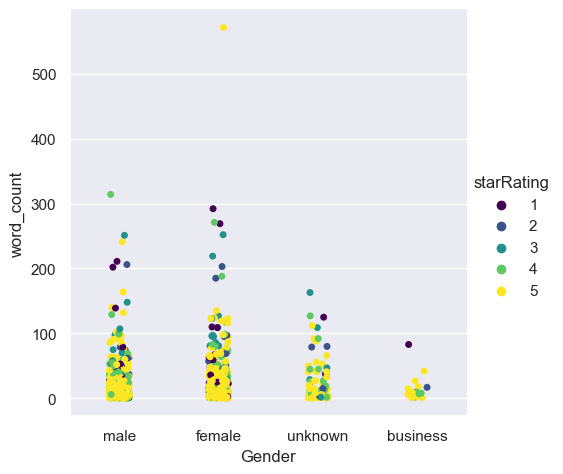

In [90]:
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "starRating",
           palette = "viridis")
#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


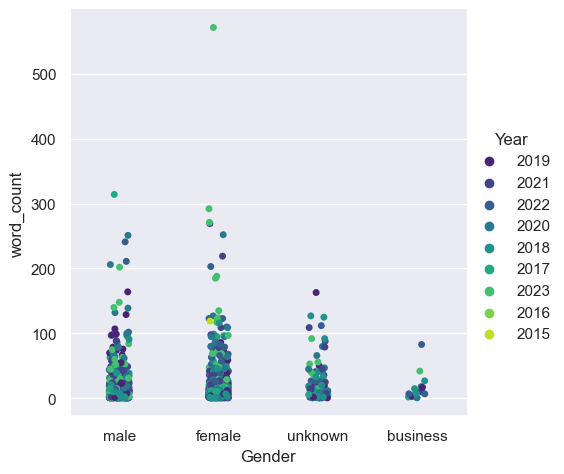

In [91]:
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "Year",
           palette = "viridis")
#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


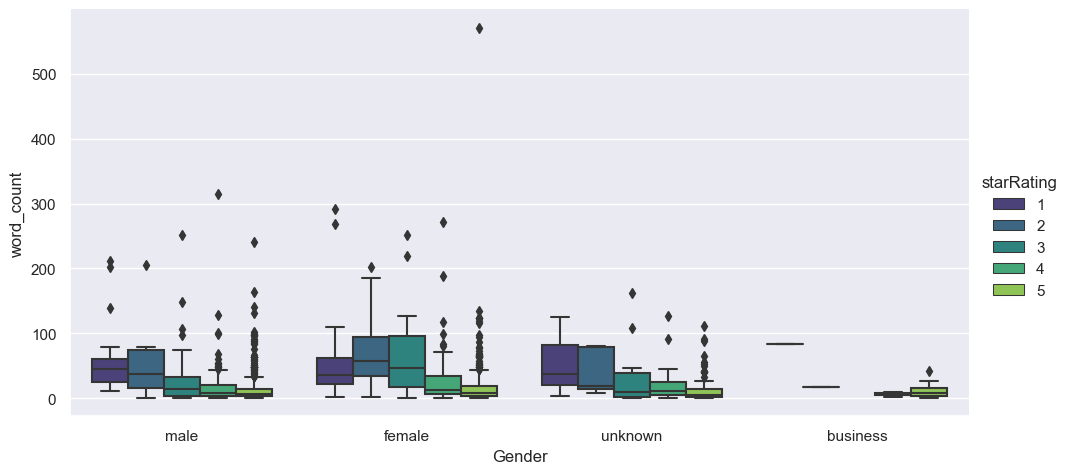

In [92]:
figuresize = (20, 10)
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "starRating",
           palette = "viridis", kind = "box", aspect = 2)
#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


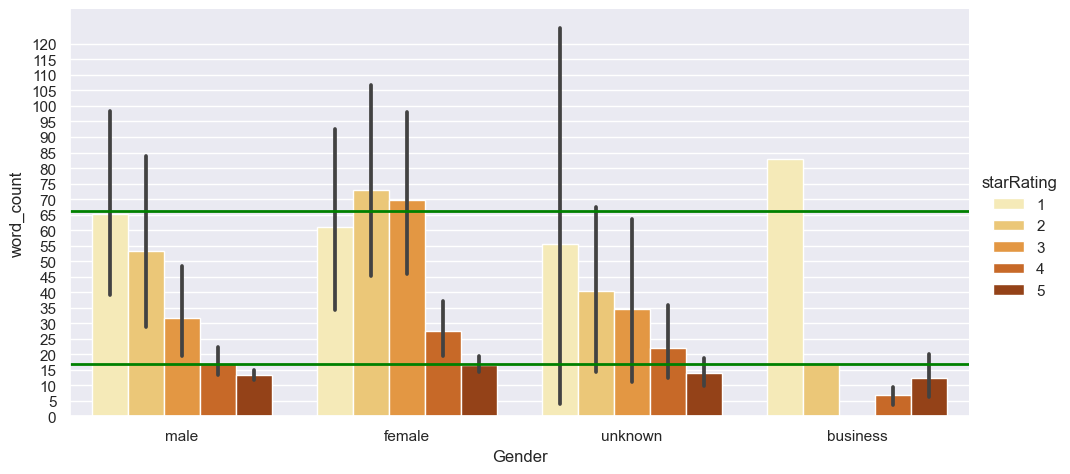

In [93]:
figuresize = (20, 10)
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "starRating",
           palette = "YlOrBr", kind = "bar", aspect = 2)

plt.axhline(y = 17, linewidth = 2, color = "green", linestyle = "-")
plt.axhline(y = 66, linewidth = 2, color = "green", linestyle = "-")

plt.yticks(range(0, 121, 5));

#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

In [94]:
averages = ct.groupby(["Gender", "starRating"])["word_count"].mean().reset_index()

averages

Gender  starRating  word_count
0   business           1   83.000000
1   business           2   17.000000
2   business           4    6.750000
3   business           5   12.454545
4     female           1   61.090909
5     female           2   73.076923
6     female           3   69.625000
7     female           4   27.419753
8     female           5   16.559387
9       male           1   65.187500
10      male           2   53.153846
11      male           3   31.825000
12      male           4   17.123529
13      male           5   13.297342
14   unknown           1   55.666667
15   unknown           2   40.400000
16   unknown           3   34.500000
17   unknown           4   22.080000
18   unknown           5   14.048193

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


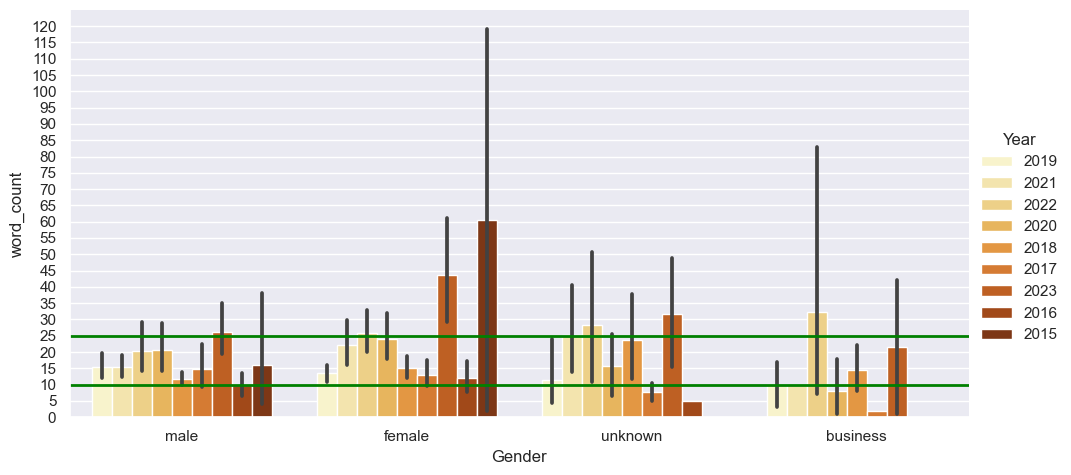

In [95]:
figuresize = (20, 10)
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "Year",
           palette = "YlOrBr", kind = "bar", aspect = 2)

plt.axhline(y = 10, linewidth = 2, color = "green", linestyle = "-")
plt.axhline(y = 25, linewidth = 2, color = "green", linestyle = "-")

plt.yticks(range(0, 121, 5));

#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

In [96]:
av_y = ct.groupby(["Gender", "Year"])["word_count"].mean().reset_index()

av_y

Gender  Year  word_count
0   business  2017    2.000000
1   business  2018   14.500000
2   business  2019   10.000000
3   business  2020    8.000000
4   business  2021   10.000000
5   business  2022   32.333333
6   business  2023   21.500000
7     female  2015   60.500000
8     female  2016   12.142857
9     female  2017   12.883721
10    female  2018   15.235849
11    female  2019   13.478992
12    female  2020   24.114583
13    female  2021   22.298077
14    female  2022   25.978495
15    female  2023   43.717647
16      male  2015   16.000000
17      male  2016    9.904762
18      male  2017   14.658824
19      male  2018   11.751323
20      male  2019   15.490066
21      male  2020   20.726415
22      male  2021   15.544715
23      male  2022   20.461538
24      male  2023   26.250000
25   unknown  2016    5.000000
26   unknown  2017    7.625000
27   unknown  2018   23.750000
28   unknown  2019   11.580645
29   unknown  2020   15.619048
30   unknown  2021   25.222222
31   unknown  2022   28.454545
32   unknown  2023   31.600000

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


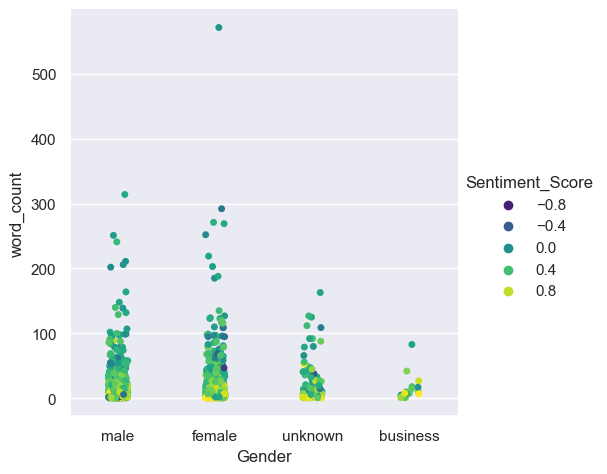

In [97]:
sns.catplot(data = ct, x = "Gender", y = "word_count", hue = "Sentiment_Score",
           palette = "viridis")
#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

## Reviews with 1 star

In [98]:
ct[ct['starRating'] == 1]

starRating    Gender  Gender_Numeric  Year  \
2              1    female               2  2019   
41             1    female               2  2023   
117            1    female               2  2023   
242            1      male               1  2022   
266            1    female               2  2022   
278            1    female               2  2019   
385            1    female               2  2021   
555            1      male               1  2020   
556            1      male               1  2020   
599            1      male               1  2023   
604            1      male               1  2023   
665            1    female               2  2023   
765            1    female               2  2023   
775            1    female               2  2018   
782            1    female               2  2019   
797            1    female               2  2019   
826            1    female               2  2021   
855            1      male               1  2020   
873            1    female               2  2023   
901            1      male               1  2020   
1069           1      male               1  2020   
1070           1      male               1  2018   
1072           1      male               1  2021   
1079           1    female               2  2021   
1114           1   unknown               3  2018   
1123           1      male               1  2020   
1141           1    female               2  2022   
1150           1      male               1  2021   
1161           1    female               2  2023   
1198           1    female               2  2023   
1260           1      male               1  2022   
1268           1      male               1  2017   
1350           1      male               1  2023   
1358           1    female               2  2019   
1390           1  business               4  2022   
1437           1   unknown               3  2023   
1442           1      male               1  2023   
1470           1    female               2  2023   
1480           1    female               2  2021   
1540           1   unknown               3  2018   
1551           1    female               2  2018   
1590           1    female               2  2018   

                                           cleaned_text  Sentiment_Score  \
2     I thought it was horrible. The location is not...        -0.073333   
41    Very bad. We went for a birthday party of a co...        -0.520000   
117   I didn't go and I won't. I sent a message to a...         0.500000   
242   I gave up due to the bad service for booking, ...        -0.500000   
266   The camping is nice, the grass to set up the t...         0.123810   
278   The campground says it doesn't take reservatio...         0.333333   
385                                     Beautiful place         0.850000   
555   They didn't let us in to see the campsite, the...         0.000000   
556   They didn't let me in to visit the campsite, t...         0.000000   
599   We rented a chalet for tomorrowland, in additi...        -0.019444   
604   Terrible service... I've been sending messages...        -0.500000   
665   I've always camped and had no problems with to...         0.250000   
765   communication problems! 1 week ago I sent a me...        -0.012500   
775   I do not recommend it, terrible camping area, ...        -0.625000   
782   DISCARE...a word that sums up the service at t...         0.000000   
797               Not very structured place for campers        -0.100000   
826   [11/2 09:37] Deia: I'd like to make a complain...        -0.186250   
855   The place is nice, the restaurant is terrible ...        -0.200000   
873   None, I've called three times and no one answe...         0.000000   
901   Bad and structure the sauna didn't work Most o...        -0.521429   
1069  We went on this holiday on 10/12/2020, we thou...         0.217292   
1070  Poor infrastructure, not enough employees and ...        -0.200000   
1072  A family with 2

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


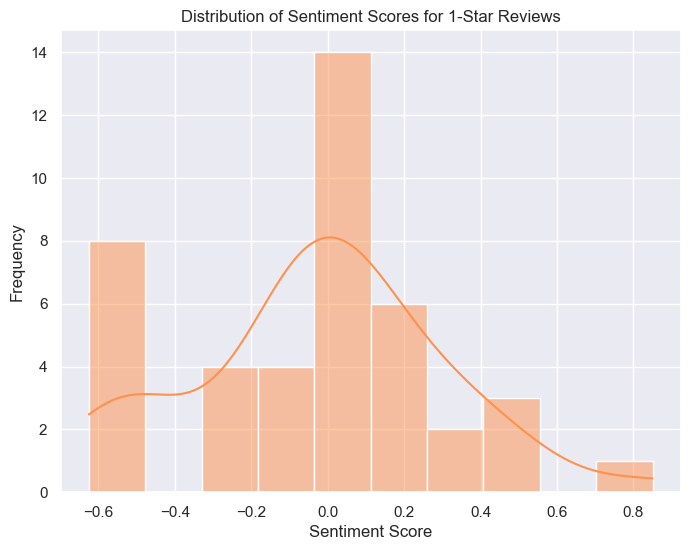

In [99]:
import seaborn as sns

# Filter rows where starRating is 1
ratings_1 = ct[ct['starRating'] == 1]

# Plot a histogram for Sentiment_Score
plt.figure(figsize = (8, 6))
sns.histplot(ratings_1['Sentiment_Score'], bins = 10, kde = True, color = "#ff914d")
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores for 1-Star Reviews')
plt.show()


### Outliers

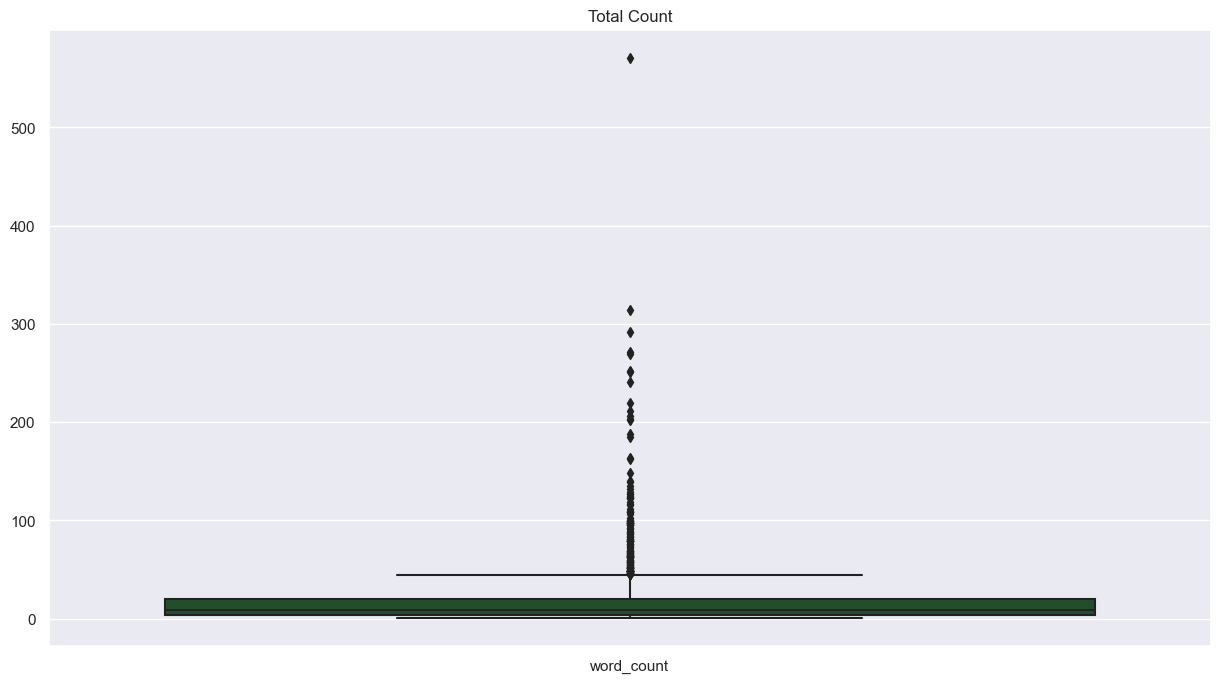

In [100]:
fig,ax = plt.subplots(figsize = (15,8))
sns.boxplot(data = ct[["word_count"]], color = "#1a562a")
ax.set_title("Total Count")
plt.show()

In [101]:
count_above_50 = len(ct[ct["word_count"] > 50])
print("Number of rows with more than 50 words:", count_above_50)

count_above_100 = len(ct[ct["word_count"] > 100])
print("Number of rows with more than 100 words:", count_above_100)

count_above_200 = len(ct[ct["word_count"] > 200])
print("Number of rows with more than 200 words:", count_above_200)

count_above_300 = len(ct[ct["word_count"] > 300])
print("Number of rows with more than 300 words:", count_above_300)

count_above_500 = len(ct[ct["word_count"] > 500])
print("Number of rows with more than 500 words:", count_above_500)

Number of rows with more than 50 words: 130
Number of rows with more than 100 words: 40
Number of rows with more than 200 words: 13
Number of rows with more than 300 words: 2
Number of rows with more than 500 words: 1


In [102]:
thresholds = [50, 100, 150, 200, 250, 300, 500]

count_dict = {}

for threshold in thresholds:
    count_dict[f'count_above_{threshold}'] = len(ct[ct["word_count"] > threshold])

count_words = pd.DataFrame(list(count_dict.items()), columns = ["Threshold", "Count"])

count_words.head(7)

Threshold  Count
0   count_above_50    130
1  count_above_100     40
2  count_above_150     17
3  count_above_200     13
4  count_above_250      7
5  count_above_300      2
6  count_above_500      1

In [103]:
pd.set_option("display.max_colwidth", None)

rows_above_500 = ct[ct["word_count"] > 500]

print(rows_above_500["cleaned_text"])

606    The place is paradisiacal. As a beach lover, I wouldn't trade the beach for a pool, after visiting the campsite, I would certainly trade the beach for a trip to it. I spent a weekend, checking in at 7pm on Friday and leaving at 5pm on Sunday. I stayed in a simple wooden chalet. It's really simple, for those who go to enjoy and have fun, it's enough to take a shower and sleep. I recommend taking repellent and cockroach poison as we found 2 in the chalet. The barbecue is precarious, the night we had a barbecue it rained and as there is no cover it was almost impossible to have a barbecue, but thank God the rain stopped after an average of 1h30m and it was possible to do it quickly, but the lighting is horrible. I found it strange because I stayed in chalet 30 and the surrounding chalets were all covered, including a table to support things, something ours didn't have. The single mattresses are good, the double mattress is very soft. In the mazanino you have to walk bent over, as i

In [104]:
pd.set_option("display.max_colwidth", None)

rows_above_500 = ct[ct["word_count"] > 500]

print(rows_above_500["starRating"])

606    5
Name: starRating, dtype: int64


In [105]:
rows_at_index_410 = ct.loc[[410]]
rows_at_index_410.head()

starRating Gender  Gender_Numeric  Year  \
410           4   male               1  2020   

                                       cleaned_text  Sentiment_Score  \
410  Great place for rest, weekends, sport fishing.              0.8   

     word_count  avg_word  
410           7  5.714286

In [106]:
rows_above_200 = ct[ct["word_count"] > 200]

print(rows_above_200["starRating"].head(13))

437     4
575     3
599     1
606     5
637     2
730     2
827     3
1079    1
1098    4
1124    3
1198    1
1260    1
1419    5
Name: starRating, dtype: int64


In [107]:
rows_above_200["starRating"].value_counts()

starRating
1    4
3    3
4    2
5    2
2    2
Name: count, dtype: int64

In [108]:
ratio_starRating = rows_above_200["starRating"].value_counts(normalize = True)

print(ratio_starRating)

starRating
1    0.307692
3    0.230769
4    0.153846
5    0.153846
2    0.153846
Name: proportion, dtype: float64


In [109]:
ratio_starRating = rows_above_200["starRating"].value_counts(normalize = True)
counts_starRating = rows_above_200["starRating"].value_counts()

df_starRating = pd.DataFrame({
    'Counts': counts_starRating,
    'Ratio': ratio_starRating
})

df_starRating.head()

Counts     Ratio
starRating                  
1                4  0.307692
3                3  0.230769
4                2  0.153846
5                2  0.153846
2                2  0.153846

## Cleaning the Text

In [110]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
stop = stopwords.words("english")

In [112]:
ct["stopwords"] = ct["cleaned_text"].apply(lambda x: len([word for word in str(x).split() if word in stop]) if isinstance(x, str) else 0)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/297852240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["stopwords"] = ct["cleaned_text"].apply(lambda x: len([word for word in str(x).split() if word in stop]) if isinstance(x, str) else 0)


In [113]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                                                                             cleaned_text  \
1643                                                                                 Very pleasant!!!!🙌🙌🙌   
1644  I only have one complaint:\nThe place is great and they treat us so well that we get used to it!!!!   
1645                                                                                Crowded.....but good!   
1646                                                                                                  Top   
1647                                                                                             Too good   

      Sentiment_Score  word_count   avg_word  stopwords  
1643         0.200000           2   9.500000          0  
1644         0.233333          20   3.714286          9  
1645         0.875000           2  10.000000          0  
1646         0.500000           1   3.000000          0  
1647         0.700000           2   3.500000          0

In [114]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")  

stop = stopwords.words("english") 

def remove_stopwords(text):
    words = [word for word in text.split() if word.lower() not in stop]
    return ' '.join(words)

ct["no_stopwords"] = ct["cleaned_text"].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/2543829788.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["no_stopwords"] = ct["cleaned_text"].apply(remove_stopwords)


In [115]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                                                                             cleaned_text  \
1643                                                                                 Very pleasant!!!!🙌🙌🙌   
1644  I only have one complaint:\nThe place is great and they treat us so well that we get used to it!!!!   
1645                                                                                Crowded.....but good!   
1646                                                                                                  Top   
1647                                                                                             Too good   

      Sentiment_Score  word_count   avg_word  stopwords  \
1643         0.200000           2   9.500000          0   
1644         0.233333          20   3.714286          9   
1645         0.875000           2  10.000000          0   
1646         0.500000           1   3.000000          0   
1647         0.700000           2   3.500000          0   

                                                  no_stopwords  
1643                                           pleasant!!!!🙌🙌🙌  
1644  one complaint: place great treat us well get used it!!!!  
1645                                     Crowded.....but good!  
1646                                                       Top  
1647                                                      good

In [116]:
ct["lower"] = ct["no_stopwords"].str.lower()

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/1115532404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["lower"] = ct["no_stopwords"].str.lower()


In [117]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                                                                             cleaned_text  \
1643                                                                                 Very pleasant!!!!🙌🙌🙌   
1644  I only have one complaint:\nThe place is great and they treat us so well that we get used to it!!!!   
1645                                                                                Crowded.....but good!   
1646                                                                                                  Top   
1647                                                                                             Too good   

      Sentiment_Score  word_count   avg_word  stopwords  \
1643         0.200000           2   9.500000          0   
1644         0.233333          20   3.714286          9   
1645         0.875000           2  10.000000          0   
1646         0.500000           1   3.000000          0   
1647         0.700000           2   3.500000          0   

                                                  no_stopwords  \
1643                                           pleasant!!!!🙌🙌🙌   
1644  one complaint: place great treat us well get used it!!!!   
1645                                     Crowded.....but good!   
1646                                                       Top   
1647                                                      good   

                                                         lower  
1643                                           pleasant!!!!🙌🙌🙌  
1644  one complaint: place great treat us well get used it!!!!  
1645                                     crowded.....but good!  
1646                                                       top  
1647                                                      good

In [118]:
ct["no_punct"] = ct["lower"].str.replace(r'[^a-zA-Z0-9\s]', '', regex = True)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/1994181758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["no_punct"] = ct["lower"].str.replace(r'[^a-zA-Z0-9\s]', '', regex = True)


In [119]:
ct.tail(3)

starRating   Gender  Gender_Numeric  Year           cleaned_text  \
1645           3  unknown               3  2018  Crowded.....but good!   
1646           5     male               1  2018                    Top   
1647           5     male               1  2018               Too good   

      Sentiment_Score  word_count  avg_word  stopwords           no_stopwords  \
1645            0.875           2      10.0          0  Crowded.....but good!   
1646            0.500           1       3.0          0                    Top   
1647            0.700           2       3.5          0                   good   

                      lower         no_punct  
1645  crowded.....but good!  crowdedbut good  
1646                    top              top  
1647                   good             good

In [120]:
ct["no_emojis"] = ct["no_punct"].apply(lambda x: emoji.demojize(x))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/433980430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["no_emojis"] = ct["no_punct"].apply(lambda x: emoji.demojize(x))


In [121]:
lemmatizer = WordNetLemmatizer()

ct["lemmatized_text"] = ct["no_emojis"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/842875810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ct["lemmatized_text"] = ct["no_emojis"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in word_tokenize(x)]))


In [122]:
ct.tail(3)

starRating   Gender  Gender_Numeric  Year           cleaned_text  \
1645           3  unknown               3  2018  Crowded.....but good!   
1646           5     male               1  2018                    Top   
1647           5     male               1  2018               Too good   

      Sentiment_Score  word_count  avg_word  stopwords           no_stopwords  \
1645            0.875           2      10.0          0  Crowded.....but good!   
1646            0.500           1       3.0          0                    Top   
1647            0.700           2       3.5          0                   good   

                      lower         no_punct        no_emojis  lemmatized_text  
1645  crowded.....but good!  crowdedbut good  crowdedbut good  crowdedbut good  
1646                    top              top              top              top  
1647                   good             good             good             good

In [123]:
ct.tail()

starRating   Gender  Gender_Numeric  Year  \
1643           5   female               2  2018   
1644           5  unknown               3  2018   
1645           3  unknown               3  2018   
1646           5     male               1  2018   
1647           5     male               1  2018   

                                                                                             cleaned_text  \
1643                                                                                 Very pleasant!!!!🙌🙌🙌   
1644  I only have one complaint:\nThe place is great and they treat us so well that we get used to it!!!!   
1645                                                                                Crowded.....but good!   
1646                                                                                                  Top   
1647                                                                                             Too good   

      Sentiment_Score  word_count   avg_word  stopwords  \
1643         0.200000           2   9.500000          0   
1644         0.233333          20   3.714286          9   
1645         0.875000           2  10.000000          0   
1646         0.500000           1   3.000000          0   
1647         0.700000           2   3.500000          0   

                                                  no_stopwords  \
1643                                           pleasant!!!!🙌🙌🙌   
1644  one complaint: place great treat us well get used it!!!!   
1645                                     Crowded.....but good!   
1646                                                       Top   
1647                                                      good   

                                                         lower  \
1643                                           pleasant!!!!🙌🙌🙌   
1644  one complaint: place great treat us well get used it!!!!   
1645                                     crowded.....but good!   
1646                                                       top   
1647                                                      good   

                                                 no_punct  \
1643                                             pleasant   
1644  one complaint place great treat us well get used it   
1645                                      crowdedbut good   
1646                                                  top   
1647                                                 good   

                                                no_emojis  \
1643                                             pleasant   
1644  one complaint place great treat us well get used it   
1645                                      crowdedbut good   
1646                                                  top   
1647                                                 good   

                                         lemmatized_text  
1643                                            pleasant  
1644  one complaint place great treat u well get used it  
1645                                     crowdedbut good  
1646                                                 top  
1647                                                good

## Cleaned Data

In [124]:
ml = ct[["starRating", "Gender_Numeric", "Year", "lemmatized_text"]]
ml.rename(columns = {"lemmatized_text": "cleaned_text"}, inplace = True)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/2190334908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.rename(columns = {"lemmatized_text": "cleaned_text"}, inplace = True)


In [125]:
ml["starRating"] = ml["starRating"].astype(int)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/476785465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["starRating"] = ml["starRating"].astype(int)


In [126]:
ml.tail()

starRating  Gender_Numeric  Year  \
1643           5               2  2018   
1644           5               3  2018   
1645           3               3  2018   
1646           5               1  2018   
1647           5               1  2018   

                                            cleaned_text  
1643                                            pleasant  
1644  one complaint place great treat u well get used it  
1645                                     crowdedbut good  
1646                                                 top  
1647                                                good

In [127]:
from textblob import TextBlob

mixed_language_text = ml["cleaned_text"].str.cat(sep = ' ')

blob = TextBlob(mixed_language_text)
sentiment = blob.sentiment

print(f"Sentiment: {sentiment.polarity}")

Sentiment: 0.4186014624394881


In [128]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment.polarity

ml["sentiment_score"] = ml["cleaned_text"].apply(analyze_sentiment)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/2782561537.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["sentiment_score"] = ml["cleaned_text"].apply(analyze_sentiment)


In [129]:
ml.tail()

starRating  Gender_Numeric  Year  \
1643           5               2  2018   
1644           5               3  2018   
1645           3               3  2018   
1646           5               1  2018   
1647           5               1  2018   

                                            cleaned_text  sentiment_score  
1643                                            pleasant         0.733333  
1644  one complaint place great treat u well get used it         0.250000  
1645                                     crowdedbut good         0.700000  
1646                                                 top         0.500000  
1647                                                good         0.700000

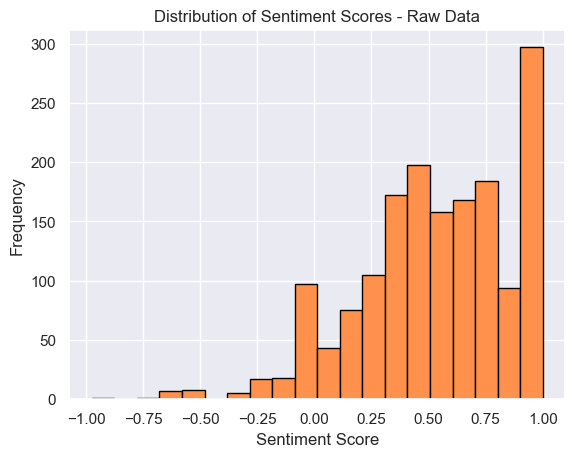

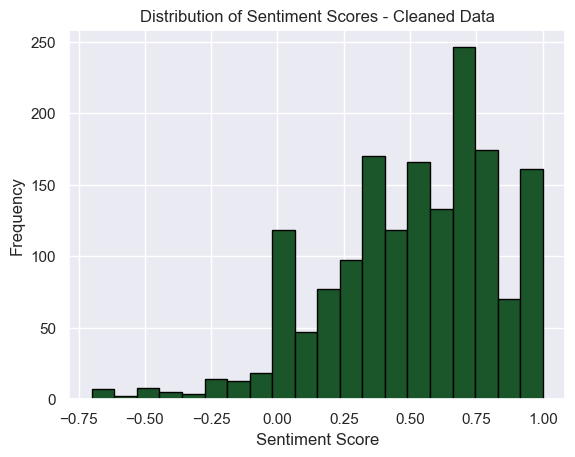

In [130]:
plt.hist(f["Sentiment_Score"], bins = 20, edgecolor = "black", color = "#ff914d")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores - Raw Data")
plt.show()

plt.hist(ml["sentiment_score"], bins = 20, edgecolor = "black", color = "#1a562a")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores - Cleaned Data")
plt.show()

In [131]:
ml.loc[:, "word_count"] = ml["cleaned_text"].apply(lambda x: len(str(x).split(" ")))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/3453364577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc[:, "word_count"] = ml["cleaned_text"].apply(lambda x: len(str(x).split(" ")))


In [132]:
def avg_word(sentence):
    words = sentence.split()
    if len(words) > 0:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0 


ml.loc[:, "avg_word"] = ml["cleaned_text"].apply(lambda x: avg_word(x))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/4073557093.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml.loc[:, "avg_word"] = ml["cleaned_text"].apply(lambda x: avg_word(x))


In [133]:
ml.tail()

starRating  Gender_Numeric  Year  \
1643           5               2  2018   
1644           5               3  2018   
1645           3               3  2018   
1646           5               1  2018   
1647           5               1  2018   

                                            cleaned_text  sentiment_score  \
1643                                            pleasant         0.733333   
1644  one complaint place great treat u well get used it         0.250000   
1645                                     crowdedbut good         0.700000   
1646                                                 top         0.500000   
1647                                                good         0.700000   

      word_count  avg_word  
1643           1       8.0  
1644          10       4.1  
1645           2       7.0  
1646           1       3.0  
1647           1       4.0

In [134]:
ml["sentiment_label"] = ml["sentiment_score"].apply(lambda x: 'Negative' if x < 0.0 else ('Neutral' if 0.0 <= x <= 0.5 else 'Positive'))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/383004667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["sentiment_label"] = ml["sentiment_score"].apply(lambda x: 'Negative' if x < 0.0 else ('Neutral' if 0.0 <= x <= 0.5 else 'Positive'))


ml["sentiment_ml"] = ml["sentiment_score"].apply(lambda x: '0' if x < 0.0 else ('1' if 0.0 <= x <= 0.5 else '2'))

In [135]:
ml["sentiment_ml"] = ml["sentiment_score"].apply(lambda x: '0' if x < 0.0 else ('1' if 0.0 <= x <= 0.5 else '2')).astype(int)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/3476091264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ml["sentiment_ml"] = ml["sentiment_score"].apply(lambda x: '0' if x < 0.0 else ('1' if 0.0 <= x <= 0.5 else '2')).astype(int)


In [136]:
ml.tail()

starRating  Gender_Numeric  Year  \
1643           5               2  2018   
1644           5               3  2018   
1645           3               3  2018   
1646           5               1  2018   
1647           5               1  2018   

                                            cleaned_text  sentiment_score  \
1643                                            pleasant         0.733333   
1644  one complaint place great treat u well get used it         0.250000   
1645                                     crowdedbut good         0.700000   
1646                                                 top         0.500000   
1647                                                good         0.700000   

      word_count  avg_word sentiment_label  sentiment_ml  
1643           1       8.0        Positive             2  
1644          10       4.1         Neutral             1  
1645           2       7.0        Positive             2  
1646           1       3.0         Neutral             1  
1647           1       4.0        Positive             2

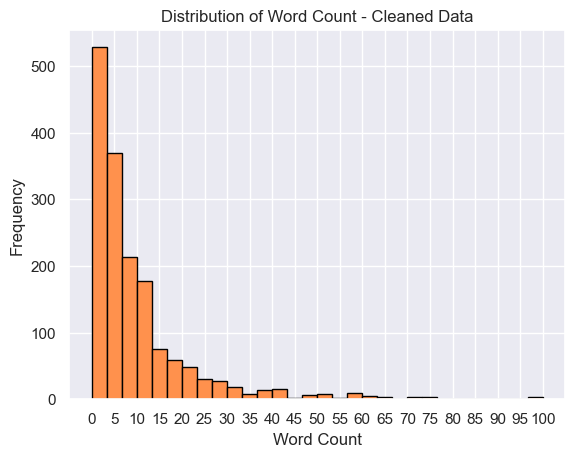

In [137]:
plt.hist(ml["word_count"], bins = 30, range = (0, 100), edgecolor = "black", 
         color = "#ff914d", align = "mid")

plt.xlabel("Word Count")
plt.xticks(range(0, 100 + 1, 5))
plt.ylabel("Frequency")
plt.title("Distribution of Word Count - Cleaned Data")
plt.show()

In [138]:
ml["word_count"].describe()

count    1648.000000
mean       10.869539
std        17.006819
min         1.000000
25%         2.000000
50%         6.000000
75%        12.000000
max       287.000000
Name: word_count, dtype: float64

### Number of Unique Words

In [139]:
text_data = ml["cleaned_text"]

vectorizer = CountVectorizer()

word_counts = vectorizer.fit_transform(text_data)

words = vectorizer.get_feature_names_out()

num_unique_words = len(words)

print("Number of unique words:", num_unique_words)

Number of unique words: 2506


https://www.nltk.org/howto/probability.html

In [140]:
fd1 = nltk.FreqDist(ml["cleaned_text"])

In [141]:
fd1

FreqDist({'good': 72, 'wonderful': 28, 'excellent': 22, 'great': 19, 'top': 14, 'great place': 12, 'wonderful place': 11, 'loved': 8, 'good place': 8, 'beautiful place': 7, ...})

In [142]:
freq_dist = nltk.FreqDist(nltk.word_tokenize(' '.join(ml["cleaned_text"])))
fw = pd.DataFrame(freq_dist.items(), columns=["Word", "Frequency"])
fw.head(1)

Word  Frequency
0   im         21

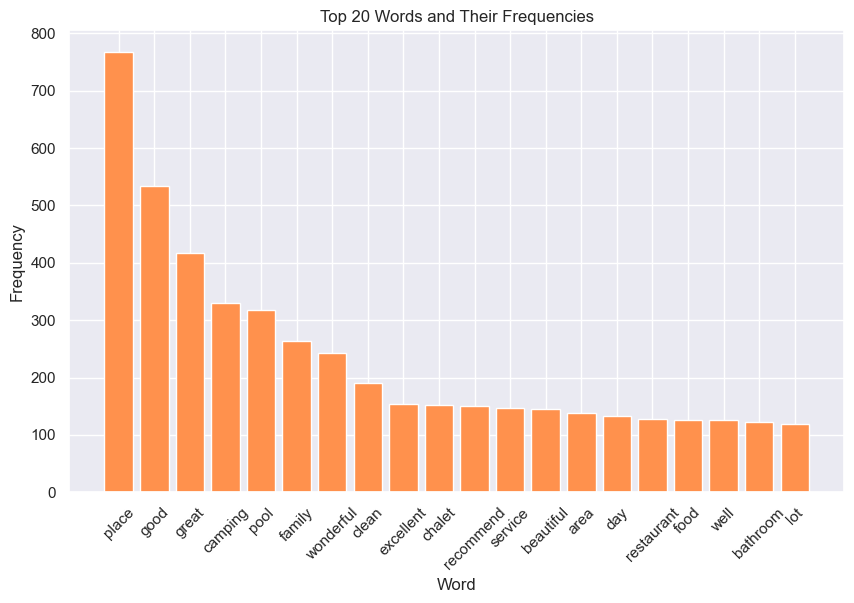

In [143]:
fw_top_10 = fw.nlargest(20, "Frequency") 
plt.figure(figsize = (10, 6))
plt.bar(fw_top_10["Word"], fw_top_10["Frequency"], color = "#ff914d")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Words and Their Frequencies")
plt.xticks(rotation = 45)
plt.show()

     Adjective  Frequency
33        good        526
11       great        417
39   wonderful        222
26       clean        165
47   excellent        142
2    beautiful        132
27        nice         93
44     several         63
131      quiet         58
10        best         55


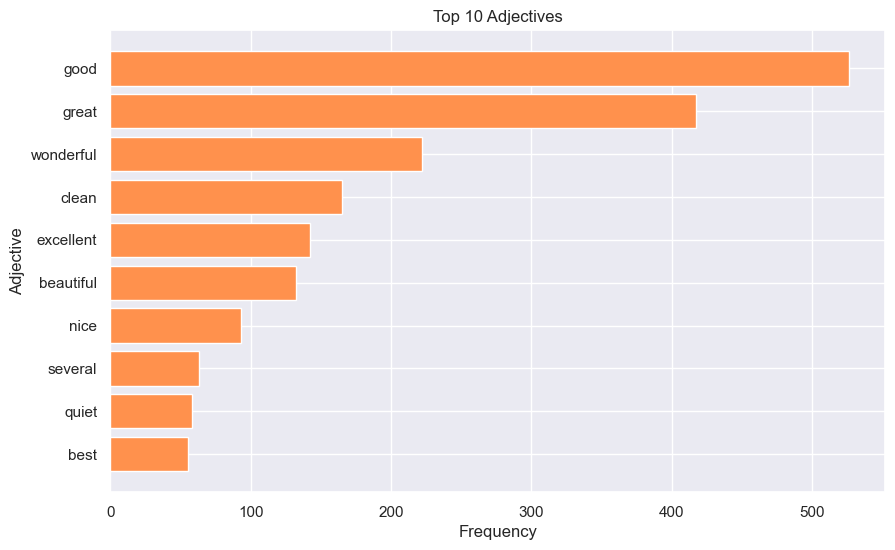

In [144]:
tokens = word_tokenize(' '.join(ml["cleaned_text"]))
tagged_words = pos_tag(tokens)

adjectives = [word for word, tag in tagged_words if tag.startswith('JJ')]

freq_dist = nltk.FreqDist(adjectives)

fw = pd.DataFrame(freq_dist.items(), columns = ["Adjective", "Frequency"])

fw = fw.sort_values(by = "Frequency", ascending = False)

print(fw.head(10))

plt.figure(figsize = (10, 6))
plt.barh(fw["Adjective"][:10], fw["Frequency"][:10], color = "#ff914d")
plt.xlabel("Frequency")
plt.ylabel("Adjective")
plt.title("Top 10 Adjectives")
plt.gca().invert_yaxis()  
plt.show()

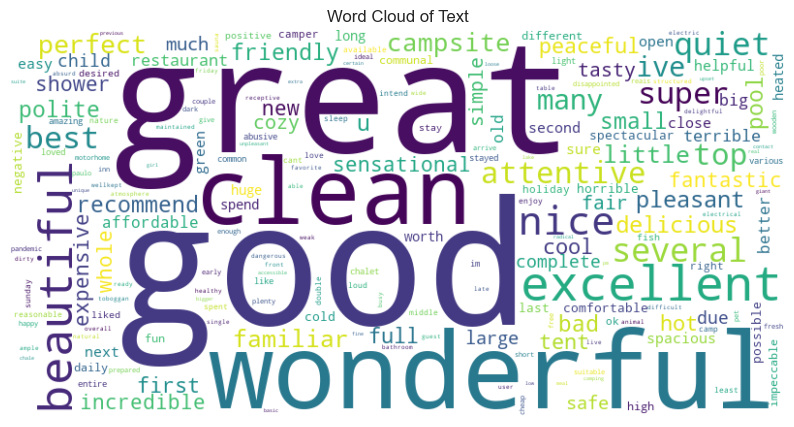

In [145]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white").generate_from_frequencies(freq_dist)
plt.figure(figsize = (10, 6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Text")
plt.show()

     Adjective  Frequency
33        good        526
11       great        417
39   wonderful        222
26       clean        165
47   excellent        142
2    beautiful        132
27        nice         93
44     several         63
131      quiet         58
10        best         55


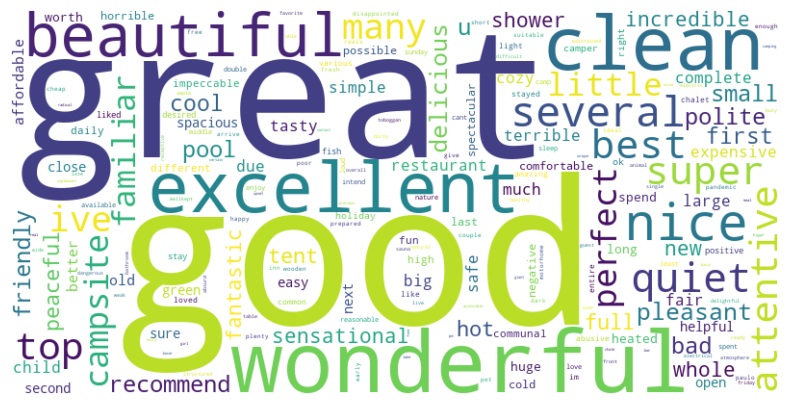

In [146]:
tokens = word_tokenize(' '.join(ml["cleaned_text"]))
tagged_words = pos_tag(tokens)

adjectives = [word for word, tag in tagged_words if tag.startswith('JJ')]

freq_dist = nltk.FreqDist(adjectives)

fw = pd.DataFrame(freq_dist.items(), columns = ["Adjective", "Frequency"])

fw = fw.sort_values(by = "Frequency", ascending = False)

print(fw.head(10))

wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white").generate_from_frequencies(freq_dist)

plt.figure(figsize = (10, 5))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

To achieve this, you can use the concordance() function from NLTK's Text class. However, ml["cleaned_text"] is a pandas Series object, and the concordance() function works with NLTK's Text objects.

You need to first combine all the text in the ml["cleaned_text"] column into a single string and then convert it into an NLTK Text object. After that, you can use the concordance() function to search for specific words and see them in the context of the phrases they appear in.

## This might be better on the raw data

In [147]:
combined_text = ' '.join(ml["cleaned_text"])

tokens = nltk.word_tokenize(combined_text)

ptext1 = Text(tokens)

ptext1.concordance("highly")

Displaying 25 of 49 matches:
im every beginning year highly recommend chalet food entertainment
en otherwise family love everything highly recommend great great family friend
 restaurant top food great location highly recommend show clean organized alwa
l beautiful place relax great place highly recommend ive always liked campsite
ture tree insect place rest fun kid highly recommend it fifth visit wonderful 
ture spectacular service tasty food highly recommend go wont sent message answ
 love im well served good food good highly recommend wonderful place rest wond
rfect food family environment green highly recommended camping area note 10 mo
mily atmosphere fair price campsite highly recommend it good spent day there l
penny wonderful place spend holiday highly recommend it wonderful experience i
place pool wonderful congratulation highly recommend paradise exist doubt para
g take whole family beautiful place highly recommend it cleanliness environmen
lable swimming pool beautiful place

In [148]:
combined_text = ' '.join(ml["cleaned_text"])

tokens = nltk.word_tokenize(combined_text)
ptext1 = Text(tokens)
ptext1.concordance("recommend")

Displaying 25 of 150 matches:
im every beginning year highly recommend chalet food entertainment wide var
place worth trip liked place tasty recommend stay well looked after great place
wise family love everything highly recommend great great family friendly place 
ul place excellent place rest best recommend approved good taste great place ni
ant top food great location highly recommend show clean organized always excell
ful place relax great place highly recommend ive always liked campsite ive goin
area clean place good coffee lunch recommend it cool good great option enjoy fa
e radical fun paintball field site recommend good recommend wonderful wonderful
aintball field site recommend good recommend wonderful wonderful worth knowing 
e insect place rest fun kid highly recommend it fifth visit wonderful great str
ctacular service tasty food highly recommend go wont sent message answer questi
e wonderful nature come back often recommend it good without doubt camping best
ironment campi

In [149]:
combined_text = ' '.join(ml["cleaned_text"])

tokens = nltk.word_tokenize(combined_text)

ptext1 = Text(tokens)

ptext1.concordance("horrible")

Displaying 12 of 12 matches:
unch lot variety delicious thought horrible location much many demand owner or
inued toilet little loose barbecue horrible recommend chalet rest ok good plac
d shower ok wonderful food leisure horrible wooden chalet hot small 10 bad sme
ponding respond send message again horrible service wonderful place exceeded e
ge 1h30m possible quickly lighting horrible found strange stayed chalet 30 sur
ink complaint contact via whatsapp horrible sent message several time trying r
pend restaurant site terrible food horrible salad sour one one bad experience 
 great thing left desired mattress horrible swimming pool two child one aged 2
 get touch communication difficult horrible feeling again pay cheap this going
ironment really liked fishing logo horrible service terrible owner rude full r
astructure whole family experience horrible filed complaint im still waiting r
eekend pitching tent sloping place horrible restaurant pool good 110v voltage 


### Sentiment Score grouping

Text(0.5, 1.0, 'Distribution of Sentiment Score')

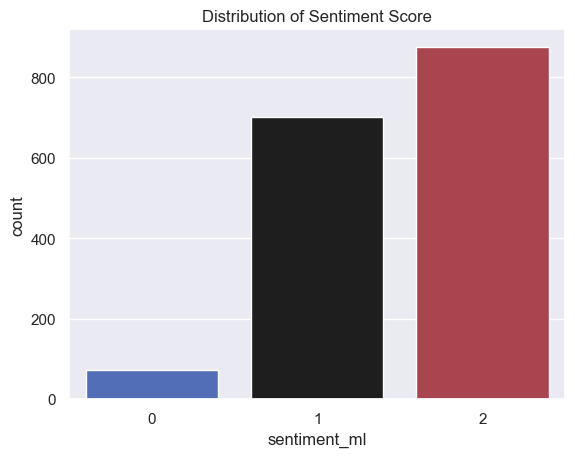

In [150]:
sns.countplot(data = ml, x = "sentiment_ml", palette = "icefire").set_title("Distribution of Sentiment Score")

In [151]:
ratio = ml["sentiment_ml"].value_counts(normalize=True)
print(ratio)

sentiment_ml
2    0.530947
1    0.425971
0    0.043083
Name: proportion, dtype: float64


In [152]:
ml["sentiment_ml"].value_counts()

sentiment_ml
2    875
1    702
0     71
Name: count, dtype: int64

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


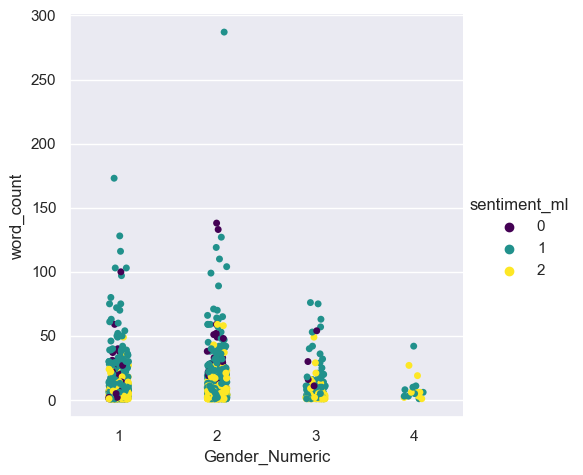

In [153]:
sns.catplot(data = ml, x = "Gender_Numeric", y = "word_count", hue = "sentiment_ml",
           palette = "viridis")
#sns.color_palette("icefire", as_cmap=True)
#"viridis" "YlOrBr" "Blues" "icefire"

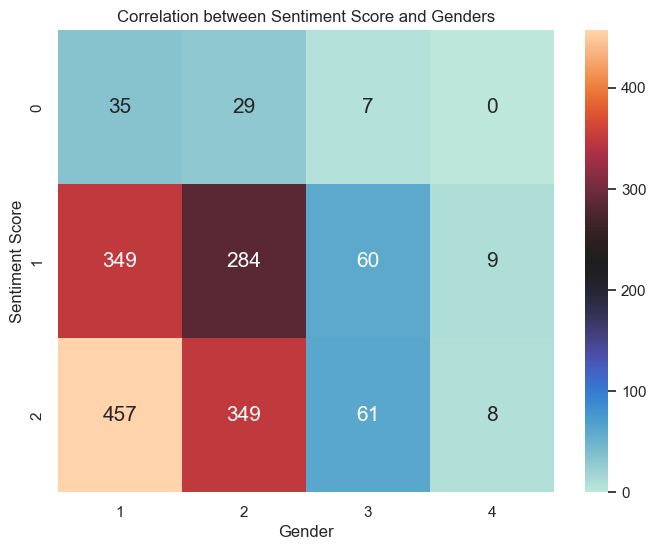

In [154]:
contingency_table = pd.crosstab(ml["sentiment_ml"], ml["Gender_Numeric"])


plt.figure(figsize = (8, 6))
sns.heatmap(contingency_table, annot = True, fmt = "d", cmap =   "icefire", cbar = True)

#"viridis" "YlOrBr" "Blues"

plt.xlabel("Gender")
plt.ylabel("Sentiment Score")
plt.title("Correlation between Sentiment Score and Genders")
plt.show()

Text(0.5, 1.0, 'Distribution of Ratings')

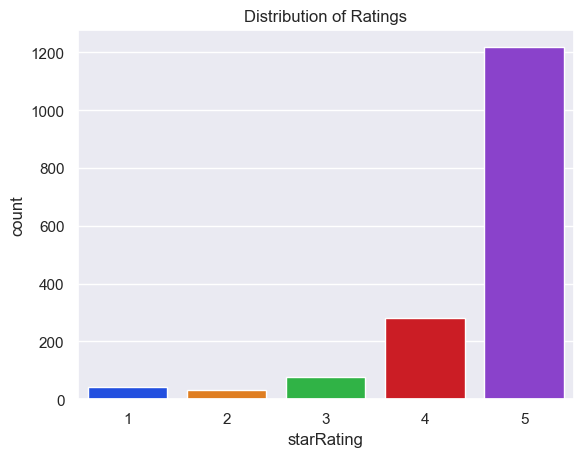

In [155]:
sns.countplot(data = ml, x = "starRating", palette = "bright").set_title("Distribution of Ratings")

In [156]:
ml["starRating"].value_counts()

starRating
5    1218
4     280
3      76
1      42
2      32
Name: count, dtype: int64

In [157]:
ratio = ml["starRating"].value_counts(normalize=True)
print(ratio)

starRating
5    0.739078
4    0.169903
3    0.046117
1    0.025485
2    0.019417
Name: proportion, dtype: float64


## Word Count and Star Rating 

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


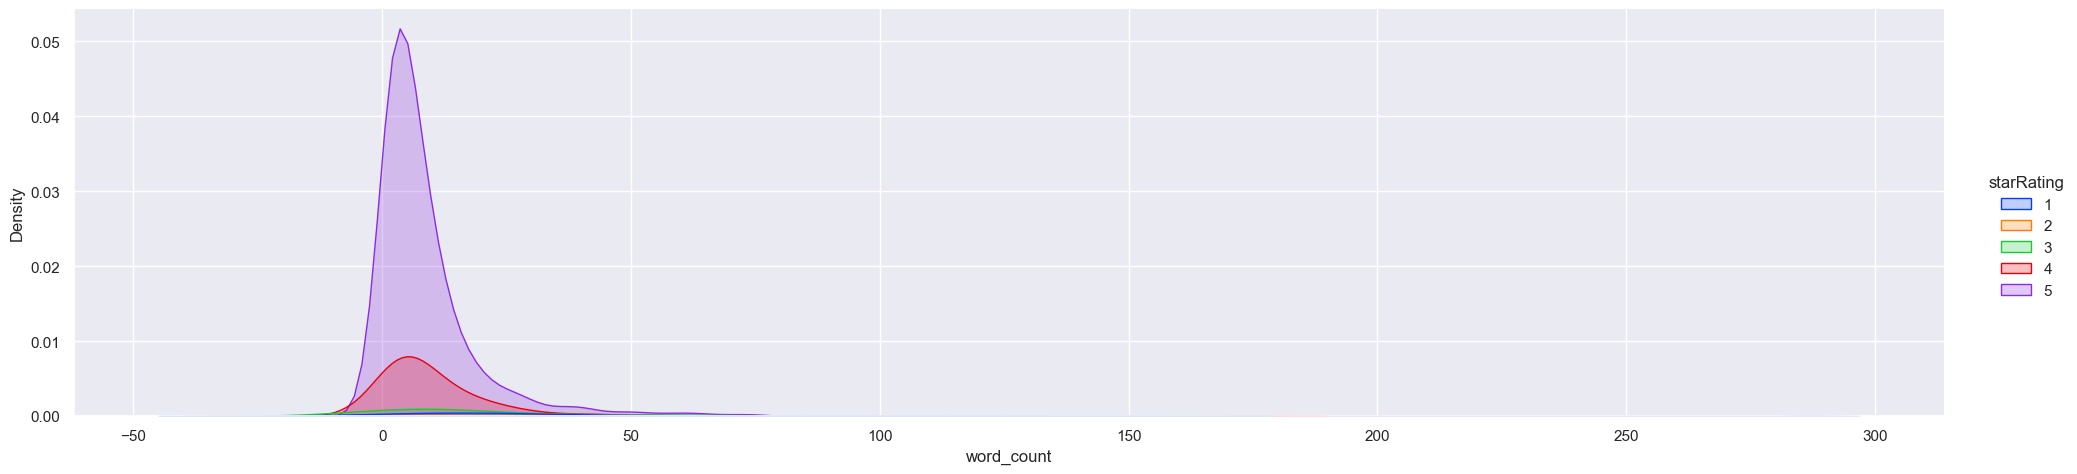

In [158]:
sns.displot(data = ml, x = "word_count", hue = "starRating", palette = "bright", 
            kind = "kde", fill= True, aspect = 4)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


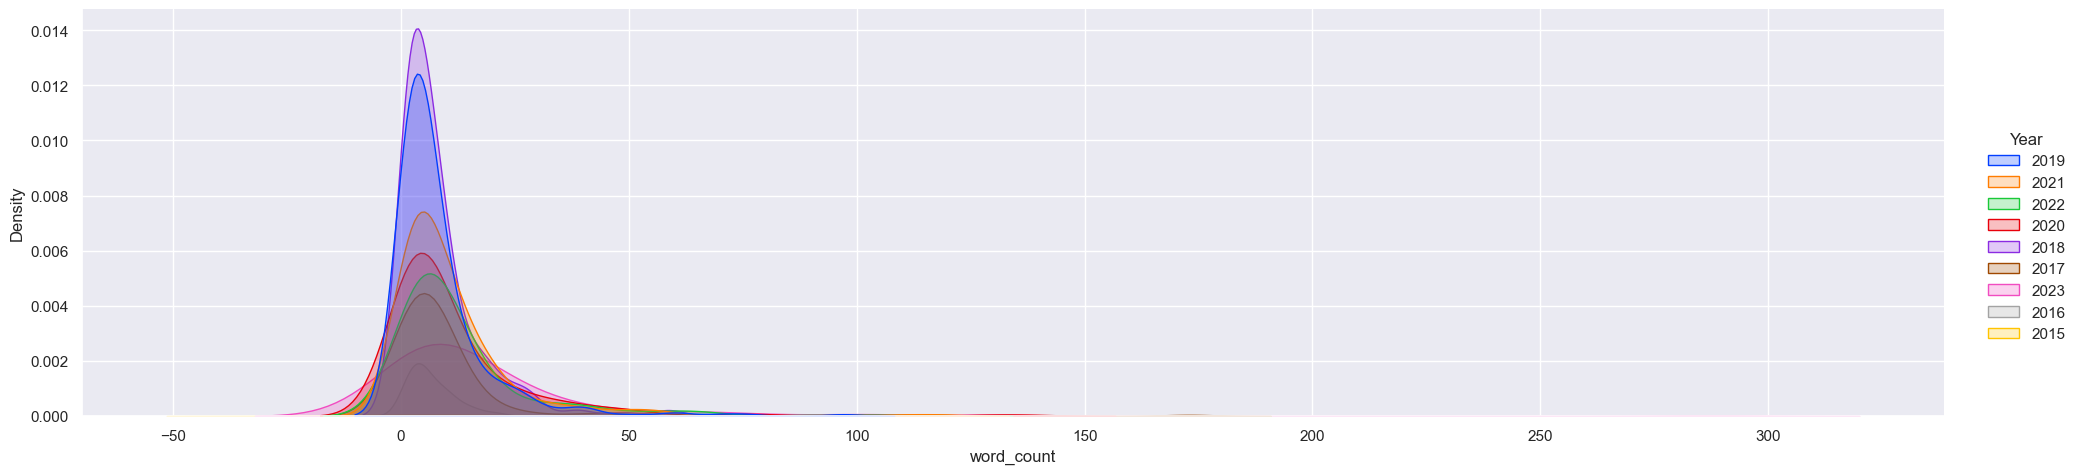

In [159]:
sns.displot(data = ml, x = "word_count", hue = "Year", palette = "bright", 
            kind = "kde", fill= True, aspect = 4)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


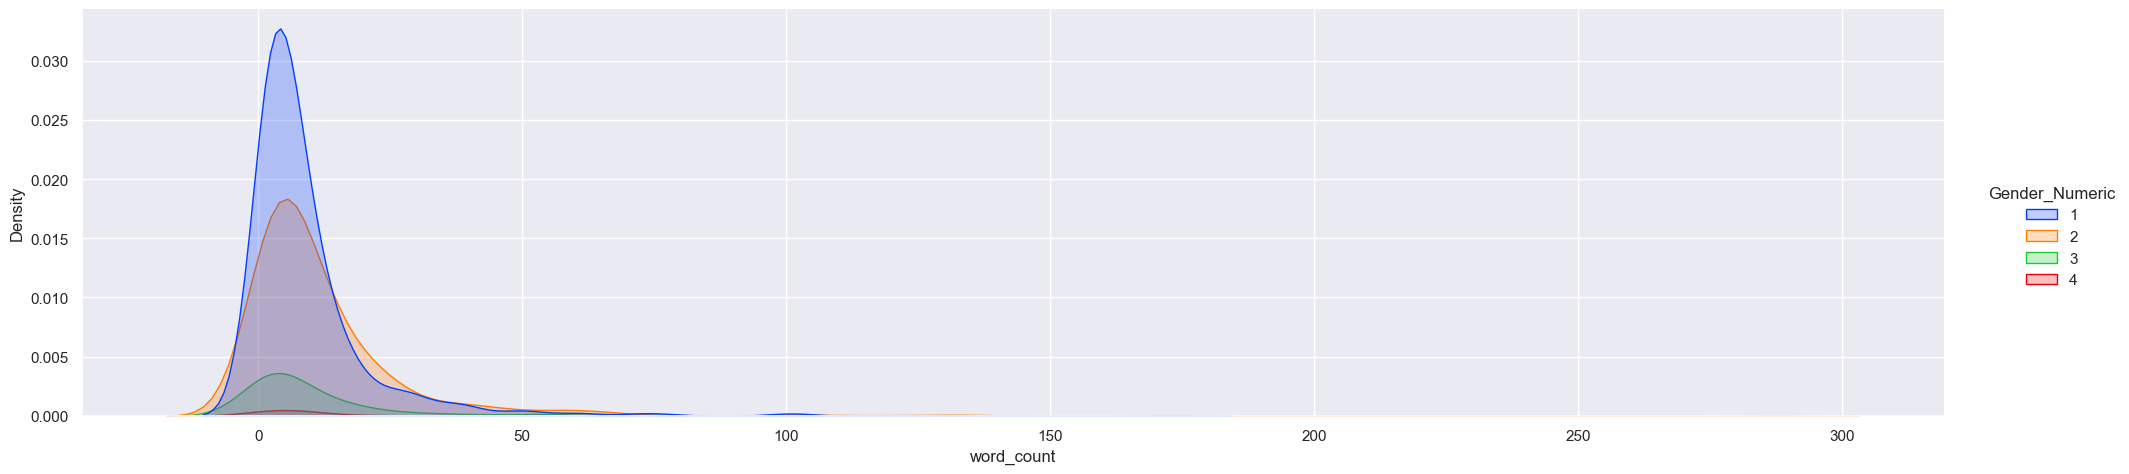

In [160]:
sns.displot(data = ml, x = "word_count", hue = "Gender_Numeric", palette = "bright", 
            kind = "kde", fill= True, aspect = 4)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


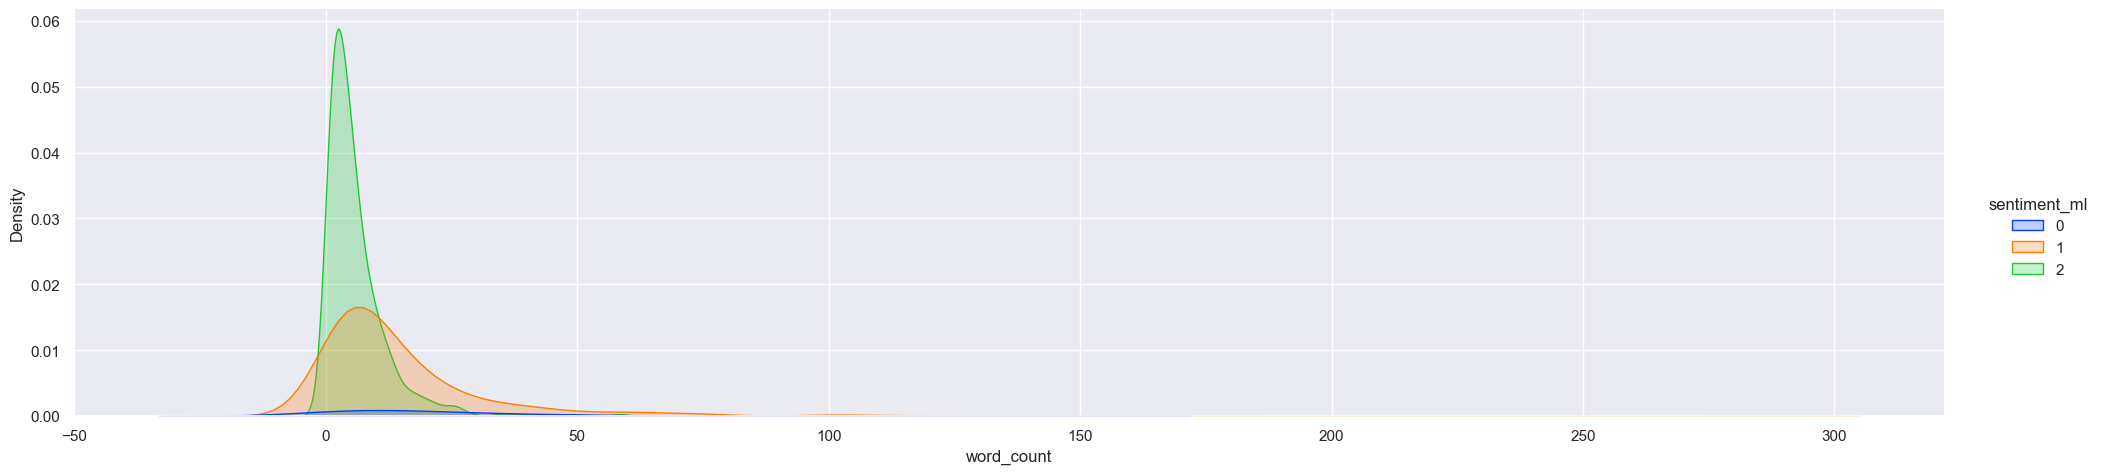

In [161]:
sns.displot(data = ml, x = "word_count", hue = "sentiment_ml", palette = "bright", 
            kind = "kde", fill= True, aspect = 4)

In [162]:
ml.tail(1)

starRating  Gender_Numeric  Year cleaned_text  sentiment_score  \
1647           5               1  2018         good              0.7   

      word_count  avg_word sentiment_label  sentiment_ml  
1647           1       4.0        Positive             2

## Most Commom N-grams

In [163]:
def _get_top_ngram(corpus, n = None):
   
    vec = CountVectorizer(ngram_range = (n, n),
                          max_df = 0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:15]

In [164]:
fig = make_subplots(rows = 1, cols = 1)

texts = ml["cleaned_text"]

new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]

top_n_bigrams = _get_top_ngram(texts, 3)[:15]
x, y = map(list, zip(*top_n_bigrams))

fig.add_trace(go.Bar(
            x = y,
            y = x,
            orientation = 'h', type = "bar",
    name = "3-grams", marker = dict(color = "coral")), 1, 1),

fig.update_layout(
    autosize = True,
    title = dict(
        text = '<b>Most Common Trigrams</b>',
        )
    )
    
fig.show()

In [165]:
def _get_top_ngram(texts, ngram_range = (1, 1), top = 15):
    vec = CountVectorizer(ngram_range = ngram_range, max_df = 0.9)
    bag_of_words = vec.fit_transform(texts)
    sum_words = bag_of_words.sum(axis = 0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]


def plot_top_ngrams_by_gender(data, gender_column, text_column, ngram_range = (1, 1), top = 15):
    fig = make_subplots(rows = 1, cols = 1)

    # Filter texts based on gender
    male_texts = data[data[gender_column] == 1][text_column]
    female_texts = data[data[gender_column] == 2][text_column]
    unknown_texts = data[data[gender_column] == 3][text_column]
    business_texts = data[data[gender_column] == 4][text_column]

    # Get top n-grams for each gender
    male_ngrams = _get_top_ngram(male_texts, ngram_range, top)
    female_ngrams = _get_top_ngram(female_texts, ngram_range, top)
    unknown_ngrams = _get_top_ngram(unknown_texts, ngram_range, top)
    business_ngrams = _get_top_ngram(business_texts, ngram_range, top)

    # Extract n-grams and their counts
    male_x, male_y = zip(*male_ngrams)
    female_x, female_y = zip(*female_ngrams)
    unknown_x, unknown_y = zip(*unknown_ngrams)
    business_x, business_y = zip(*business_ngrams)

    # Add traces for each gender
    fig.add_trace(go.Bar( x = male_y, y = male_x, orientation = 'h', name = 'Male', marker = dict(color = "blue")), 1, 1)
    fig.add_trace(go.Bar(x = female_y, y = female_x, orientation = 'h', name = ' Female', marker = dict(color = "red")), 1, 1)
    fig.add_trace(go.Bar(x = unknown_y, y = unknown_x, orientation='h', name = 'Unknown', marker = dict(color = 'gray')), 1, 1)
    fig.add_trace(go.Bar(x = business_y, y = business_x, orientation='h', name = 'Business', marker = dict(color = "gray")), 1, 1)

    fig.update_layout(
        autosize = True,
        title = '<b>Most Common N-grams by Gender</b>'
    )

    fig.show()

plot_top_ngrams_by_gender(ml, "Gender_Numeric", "cleaned_text", ngram_range = (3, 3))

In [166]:
def plot_top_ngrams_by_gender(data, gender_column, text_column, ngram_range = (1, 1), top = 15):
    fig = make_subplots(rows = 1, cols = 1)

    male_texts = data[data[gender_column] == 1][text_column]
    female_texts = data[data[gender_column] == 2][text_column]

    male_ngrams = _get_top_ngram(male_texts, ngram_range, top)
    female_ngrams = _get_top_ngram(female_texts, ngram_range, top)

    male_x, male_y = zip(*male_ngrams)
    female_x, female_y = zip(*female_ngrams)

    fig.add_trace(go.Bar(x = male_y, y = male_x, orientation = 'h', name = 'Male', marker = dict(color = "blue")), 1, 1)
    fig.add_trace(go.Bar(x = female_y, y = female_x, orientation = 'h', name = 'Female', marker = dict(color = "red")), 1, 1)

    fig.update_layout(
        autosize = True,
        title = '<b>Most Common N-grams by Gender</b>'
    )

    fig.show()
    
plot_top_ngrams_by_gender(ml, "Gender_Numeric", "cleaned_text", ngram_range = (3, 3))

In [167]:
def plot_top_ngrams_by_rating(data, rating_column, text_column, ngram_range = (1, 1), top = 15):
    fig = make_subplots(rows = 1, cols = 1)

    data[rating_column] = data[rating_column].astype(str)

    ratings = data[rating_column].unique()

    for rating in ratings:
        
        rating_texts = data[data[rating_column] == rating][text_column]

        rating_ngrams = _get_top_ngram(rating_texts, ngram_range, top)

        x, y = zip(*rating_ngrams)

        fig.add_trace(go.Bar(x = y, y = x, orientation = 'h', name = f'Rating {rating}'), 1, 1)

    fig.update_layout(
        autosize = True,
        title = '<b>Most Common N-grams by Rating</b>'
    )

    fig.show()

plot_top_ngrams_by_rating(ml, "starRating", "cleaned_text", ngram_range=(3, 3))

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/1984599639.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [168]:
def plot_top_ngrams_by_rating(data, rating_column, text_column, ngram_range=(1, 1), top=15):
    fig = make_subplots(rows=1, cols=1)

    data[rating_column] = data[rating_column].astype(str)

    # Filter data for reviews with 1 and 5-star ratings
    filtered_data = data[data[rating_column].isin(['1', '5'])]

    ratings = filtered_data[rating_column].unique()

    for rating in ratings:

        rating_texts = filtered_data[filtered_data[rating_column] == rating][text_column]

        rating_ngrams = _get_top_ngram(rating_texts, ngram_range, top)

        x, y = zip(*rating_ngrams)

        fig.add_trace(go.Bar(x=y, y=x, orientation='h', name=f'Rating {rating}'), 1, 1)

    fig.update_layout(
        autosize=True,
        title='<b>Most Common N-grams by Rating</b>'
    )

    fig.show()

plot_top_ngrams_by_rating(ml, "starRating", "cleaned_text", ngram_range=(3, 3))


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/3767048861.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
def plot_top_ngrams_by_rating(data, rating_column, text_column, ngram_range=(1, 1), top=15):
    fig = make_subplots(rows=1, cols=1)

    data[rating_column] = data[rating_column].astype(str)

    # Filter data for reviews with 1 and 5-star ratings
    filtered_data = data[data[rating_column].isin(['1'])]

    ratings = filtered_data[rating_column].unique()

    for rating in ratings:

        rating_texts = filtered_data[filtered_data[rating_column] == rating][text_column]

        rating_ngrams = _get_top_ngram(rating_texts, ngram_range, top)

        x, y = zip(*rating_ngrams)

        fig.add_trace(go.Bar(x=y, y=x, orientation='h', marker=dict(color='red'), name=f'Rating {rating}'), 1, 1)

    fig.update_layout(
        autosize=True,
        title='<b>Most Common N-grams by Rating</b>'
    )

    fig.show()

plot_top_ngrams_by_rating(ml, "starRating", "cleaned_text", ngram_range=(2, 2))


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/4273265976.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
ml["starRating"].value_counts()

starRating
5    1218
4     280
3      76
1      42
2      32
Name: count, dtype: int64

https://www.kaggle.com/code/kubes57/sentiment-classifier-rnn

source of this graph

In [171]:
ml.tail(1)

starRating  Gender_Numeric  Year cleaned_text  sentiment_score  \
1647          5               1  2018         good              0.7   

      word_count  avg_word sentiment_label  sentiment_ml  
1647           1       4.0        Positive             2

https://pypi.org/project/afinn/
http://www2.imm.dtu.dk/pubdb/edoc/imm6006.pdf
https://www.nltk.org

In [172]:
nltk.download('punkt')

afinn = Afinn()

for review in ml["cleaned_text"]:
    
    tokens = nltk.word_tokenize(str(review))
    
    word_scores = [afinn.score(token) for token in tokens]
    
overall_score = sum(word_scores)

print("Review:", review)
print("Word Scores:", word_scores)
print("Overall Score:", overall_score)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Review: good
Word Scores: [3.0]
Overall Score: 3.0


In [173]:
from afinn import Afinn
import nltk

nltk.download('punkt')

afinn = Afinn()

for review in ml["cleaned_text"]:
    tokens = nltk.word_tokenize(str(review))
    word_scores = [afinn.score(token) for token in tokens]
    overall_score = sum(word_scores)
    
    print("Review:", review)
    print("Word Scores:", word_scores)
    print("Overall Score:", overall_score)
    print()


Review: im every beginning year highly recommend chalet food entertainment wide variety
Word Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Score: 2.0

Review: beautiful pleasant place breakfast lunch lot variety delicious
Word Scores: [3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0]
Overall Score: 9.0

Review: thought horrible location much many demand owner order come loud noise much le accumulation tent
Word Scores: [0.0, -3.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Score: -4.0

Review: one best canpings region
Word Scores: [0.0, 3.0, 0.0, 0.0]
Overall Score: 3.0

Review: family place found thing site expensive like lunch ice cream entrance chalet
Word Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Score: 2.0

Review: great place affordable price thats greices trailer is
Word Scores: [3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Score: 5.0

Review: went campsite stay saturday sunday arrived 330 pm w

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/izaiaszacca/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Review: recommend great place
Word Scores: [2.0, 3.0, 0.0]
Overall Score: 5.0

Review: excellent worth
Word Scores: [3.0, 2.0]
Overall Score: 5.0

Review: wonderful beautiful familiar place chalet little dusty good
Word Scores: [4.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0]
Overall Score: 10.0

Review: visited hat sol camping wonderful bathroom clean camping area great communal kitchen first experience camping hat sol stopped since highly recommend it close shopping mall city center make easy walk around forget something
Word Scores: [0.0, 0.0, 0.0, 0.0, 4.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0]
Overall Score: 10.0

Review: love place
Word Scores: [3.0, 0.0]
Overall Score: 3.0

Review: like itclosed swimming pool overcrowdedi like service also leaf something desired
Word Scores: [2.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 2.0]
Overall Score: 6.0

Review: reception accommodation spe

Review: spacious safe place clean chalet good restaurant clean pool lot area walk rest
Word Scores: [1.0, 1.0, 0.0, 2.0, 0.0, 3.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Overall Score: 9.0

Review: incredible experience visit camping chapu de sol stayed wellorganized clean chalet facility refrigerator stove bed tv also took advantage entire camping structure campinh plenty structure come child congratulation management love it next
Word Scores: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0]
Overall Score: 9.0

Review: changed previous evaluation responded complaint assured correct problem changed evaluation try sure place beautiful great rest stress day life sp also good reading writing silence addition beauty place main attraction opinion thank chapu sol listening me
Word Scores: [0.0, 0.0, 0.0, 0.0, -2.0, 0.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, -1.0, 0.0, 0.0,

# Machine Learning 

In [174]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from collections import Counter
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, adjusted_rand_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from xgboost import XGBClassifier


Stratified Splitting:

The stratify=y argument is crucial for classification problems where you have multiple categories in your target variable y. It ensures that the proportion of classes in the training set is similar to the proportion in the entire dataset. This is important to avoid a situation where the training set might be biased towards certain classes, leading to poor model performance on the unseen test data.

In [175]:
positive = [4, 5]
neutral = [3]
negative = [1, 2]

def map_sentiment(starRating):
    if starRating in positive:
        return 2
    elif starRating in negative:
        return 1
    else:
        return 0

ml["sentiment"]= ml["starRating"].apply(map_sentiment)

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_1498/3972282787.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [176]:
ml.tail(1)

starRating  Gender_Numeric  Year cleaned_text  sentiment_score  \
1647          5               1  2018         good              0.7   

      word_count  avg_word sentiment_label  sentiment_ml  sentiment  
1647           1       4.0        Positive             2          0

https://scikit-learn.org/stable/modules/cross_validation.html#stratification

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)  # Keep all features
X = tfidf.fit_transform(ml["cleaned_text"])


In [177]:
tfidf = TfidfVectorizer(ngram_range = (1, 1), max_features = 500, tokenizer = word_tokenize)
X = tfidf.fit_transform(ml["cleaned_text"])
y = ml["sentiment_ml"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 12, stratify = y)


/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



from imblearn.under_sampling import NearMiss

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

# Create an object by calling a methof NearMiss()
nr = NearMiss()

# Train the model
X_train, y_train = nr.fit_resample(X_train, y_train)

In [178]:
from imblearn.over_sampling import SMOTE

# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

tfidf = TfidfVectorizer(ngram_range = (1, 1), max_features = 500, tokenizer = word_tokenize)
X = tfidf.fit_transform(ml["cleaned_text"])
y = ml["sentiment_ml"]

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=12)

# Initialize lists to store evaluation metrics
accuracies = []

# Split the data with StratifiedKFold and train the model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

from sklearn.model_selection import GroupKFold

# Your previous code
tfidf = TfidfVectorizer(ngram_range=(1, 1), max_features = 500, tokenizer=word_tokenize)
X = tfidf.fit_transform(ml["cleaned_text"])
y = ml["sentiment_ml"]

# Initialize GroupKFold
gkf = GroupKFold(n_splits = 2)

# Split the data with GroupKFold
for train_index, test_index in gkf.split(X, y, groups=y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Your training and testing code here...


from sklearn.model_selection import GroupKFold

# Your previous code
tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=1000, tokenizer=word_tokenize)
X = tfidf.fit_transform(ml["cleaned_text"])
y = ml["sentiment_ml"]
groups = ml["sentiment_score"]  # Assuming you have a column named "group_column" in your DataFrame

# Initialize GroupKFold
gkf = GroupKFold(n_splits=3)

# Split the data with GroupKFold
for train_index, test_index in gkf.split(X, y, groups=groups):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Your training and testing code here...


In [179]:
# Build the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

# Calculate accuracy and print classification report
accuracy_rf = accuracy_score(y_test, predicted_rf)
print('Accuracy:', accuracy_rf)
print('Classification Report:')
print(classification_report(y_test, predicted_rf))

Accuracy: 0.8446601941747572
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.56      0.53        18
           1       0.80      0.84      0.82       175
           2       0.91      0.87      0.89       219

    accuracy                           0.84       412
   macro avg       0.74      0.76      0.75       412
weighted avg       0.85      0.84      0.85       412



In [180]:
y_train_pred = rf.predict(X_train)

y_test_pred = rf.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on Training Set:", accuracy_train)
print("Accuracy on Test Set:", accuracy_test)

Accuracy on Training Set: 0.994410569105691
Accuracy on Test Set: 0.8446601941747572


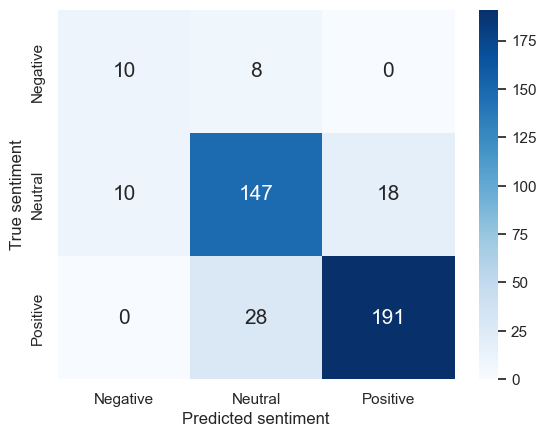

In [181]:
# Build confusion matrix
cm_rf = confusion_matrix(y_test, predicted_rf)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Naive Bayes Multinominal

In [182]:
# Build the model
nb = MultinomialNB()
nb.fit(X_train, y_train)

predicted_nb = nb.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_nb = accuracy_score(y_test, predicted_nb)
print('Accuracy:', accuracy_nb)
print('Classification Report:')
print(classification_report(y_test, predicted_nb))

Accuracy: 0.7864077669902912
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.61      0.37        18
           1       0.81      0.68      0.74       175
           2       0.87      0.89      0.88       219

    accuracy                           0.79       412
   macro avg       0.65      0.73      0.66       412
weighted avg       0.82      0.79      0.80       412



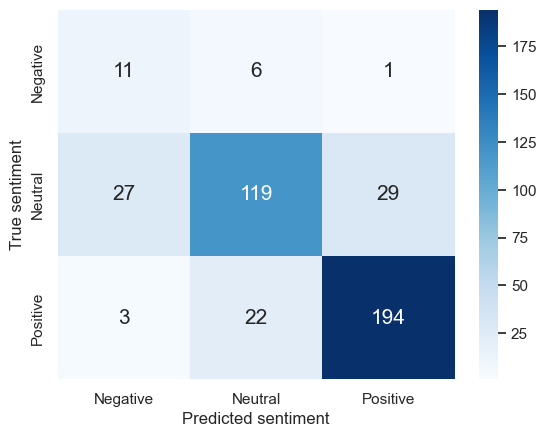

In [183]:
cm_nb = confusion_matrix(y_test, predicted_nb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## XGBoost

In [184]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

predicted_xgb = xgb.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_xgb = accuracy_score(y_test, predicted_xgb)
print('Accuracy:', accuracy_xgb)
print('Classification Report:')
print(classification_report(y_test, predicted_xgb))

Accuracy: 0.8640776699029126
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.39      0.44        18
           1       0.82      0.87      0.85       175
           2       0.93      0.89      0.91       219

    accuracy                           0.86       412
   macro avg       0.75      0.72      0.73       412
weighted avg       0.86      0.86      0.86       412



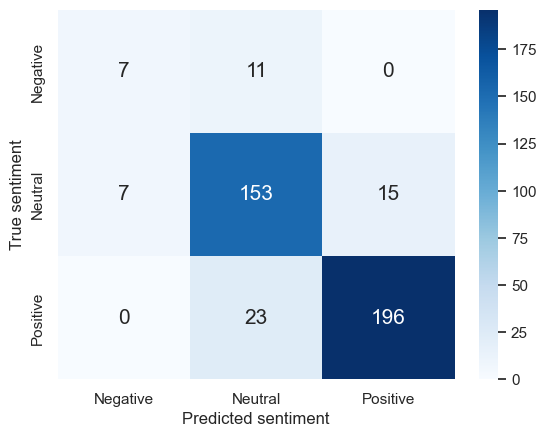

In [185]:
cm_xgb = confusion_matrix(y_test, predicted_xgb)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_xgb, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Logistic Regression

In [186]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)

predicted_lr = lr.predict(X_test)

# Calculate accuracy and print classification report
accuracy_lr = accuracy_score(y_test, predicted_lr)
print('Accuracy:', accuracy_lr)
print('Classification Report:')
print(classification_report(y_test, predicted_lr))

Accuracy: 0.8422330097087378
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.67      0.53        18
           1       0.81      0.84      0.82       175
           2       0.93      0.86      0.89       219

    accuracy                           0.84       412
   macro avg       0.73      0.79      0.75       412
weighted avg       0.85      0.84      0.85       412



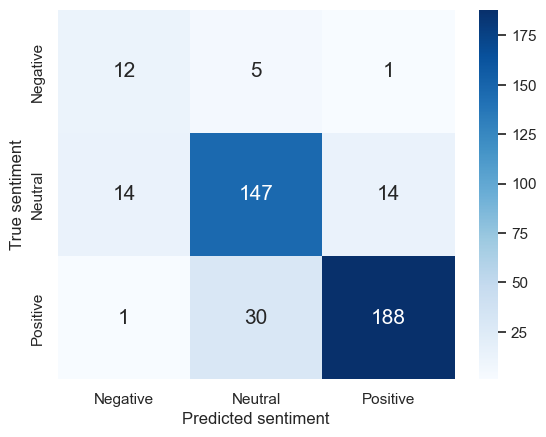

In [187]:
cm_lr = confusion_matrix(y_test, predicted_lr)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

## Linear Support Vector Classification

In [188]:
svc = LinearSVC(random_state=42)
svc.fit(X_train, y_train)

predicted_svc = svc.predict(X_test)

# Calculate accuracy and print classification report
accuracy_svc = accuracy_score(y_test, predicted_svc)
print('Accuracy:', accuracy_svc)
print('Classification Report:')
print(classification_report(y_test, predicted_svc))

Accuracy: 0.8300970873786407
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.61      0.46        18
           1       0.81      0.79      0.80       175
           2       0.91      0.88      0.90       219

    accuracy                           0.83       412
   macro avg       0.70      0.76      0.72       412
weighted avg       0.85      0.83      0.84       412



/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.



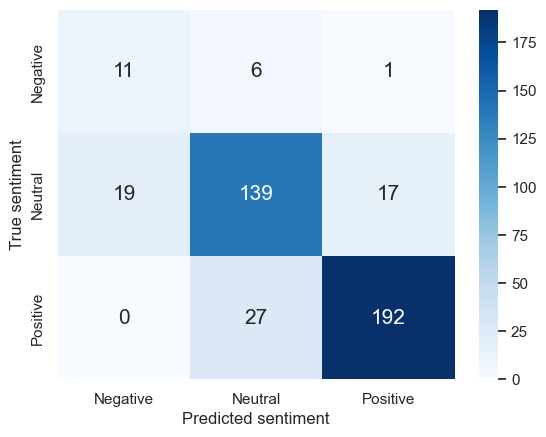

In [189]:
cm_svc = confusion_matrix(y_test, predicted_svc)

# Create heatmap
labels = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm_svc, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted sentiment')
plt.ylabel('True sentiment')
plt.show()

In [190]:
Models = ['Random Forest', 'Naive Bayes Multinominal', 'XGBoost', 'Logistic Regression', 'SVC']
Scores = [accuracy_rf, accuracy_nb, accuracy_xgb, accuracy_lr, accuracy_svc]
performance = pd.DataFrame(list(zip(Models, Scores)), 
                          columns = ['Models', 'Accuracy_score'])\
                            .sort_values('Accuracy_score', ascending=False)
performance

Models  Accuracy_score
2                   XGBoost        0.864078
0             Random Forest        0.844660
3       Logistic Regression        0.842233
4                       SVC        0.830097
1  Naive Bayes Multinominal        0.786408

In [191]:
ml.tail(1)

starRating  Gender_Numeric  Year cleaned_text  sentiment_score  \
1647          5               1  2018         good              0.7   

      word_count  avg_word sentiment_label  sentiment_ml  sentiment  
1647           1       4.0        Positive             2          0

In [192]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Assuming you have a DataFrame 'data' with 'text' and 'sentiment' columns
# Replace 'text' and 'sentiment' with the actual column names in your DataFrame
X = ml["cleaned_text"]
y = ml["sentiment_ml"]

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences to ensure uniform length
max_sequence_length = 100  # You can adjust this as needed
X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)

# Convert labels to one-hot encoding
num_classes = len(set(y))
y_encoded = pd.get_dummies(y).values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Define the LSTM model
embedding_dim = 100  # Dimension of word embeddings
lstm_units = 128  # Number of LSTM units
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(lstm_units))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
batch_size = 32  # You can adjust this as needed
epochs = 10  # You can adjust this as needed
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_true, y_pred))


Epoch 1/10
33/33 [==============================] - 2s 56ms/step - loss: 0.8696 - accuracy: 0.5247 - val_loss: 0.8103 - val_accuracy: 0.6136
Epoch 2/10
33/33 [==============================] - 2s 50ms/step - loss: 0.7032 - accuracy: 0.6822 - val_loss: 0.6805 - val_accuracy: 0.6932
Epoch 3/10
33/33 [==============================] - 2s 50ms/step - loss: 0.5324 - accuracy: 0.7742 - val_loss: 0.5605 - val_accuracy: 0.7689
Epoch 4/10
33/33 [==============================] - 2s 52ms/step - loss: 0.3187 - accuracy: 0.8899 - val_loss: 0.5554 - val_accuracy: 0.8106
Epoch 5/10
33/33 [==============================] - 2s 50ms/step - loss: 0.2031 - accuracy: 0.9374 - val_loss: 0.5145 - val_accuracy: 0.8371
Epoch 6/10
33/33 [==============================] - 2s 54ms/step - loss: 0.1270 - accuracy: 0.9687 - val_loss: 0.6068 - val_accuracy: 0.8182
Epoch 7/10
33/33 [==============================] - 2s 54ms/step - loss: 0.0869 - accuracy: 0.9810 - val_loss: 0.6391 - val_accuracy: 0.8447
Epoch 8/10
33

In [193]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best parameters to train a new XGBoost model
xgb_best = XGBClassifier(**best_params)
xgb_best.fit(X_train, y_train)

# Predict on the test set using the tuned model
predicted_xgb_best = xgb_best.predict(X_test)

# Calculate accuracy and print classification report 
accuracy_xgb_best = accuracy_score(y_test, predicted_xgb_best)
print('Accuracy (Tuned XGBoost):', accuracy_xgb_best)
print('Classification Report (Tuned XGBoost):')
print(classification_report(y_test, predicted_xgb_best))


Accuracy (Tuned XGBoost): 0.693939393939394
Classification Report (Tuned XGBoost):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.69      0.74      0.72       147
           2       0.81      0.80      0.80       163

   micro avg       0.75      0.72      0.74       330
   macro avg       0.50      0.51      0.51       330
weighted avg       0.71      0.72      0.72       330
 samples avg       0.71      0.72      0.71       330



/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

